In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import json
def load_json(filename):
    with open(filename) as data_file:
        result = json.load(data_file)

    return result


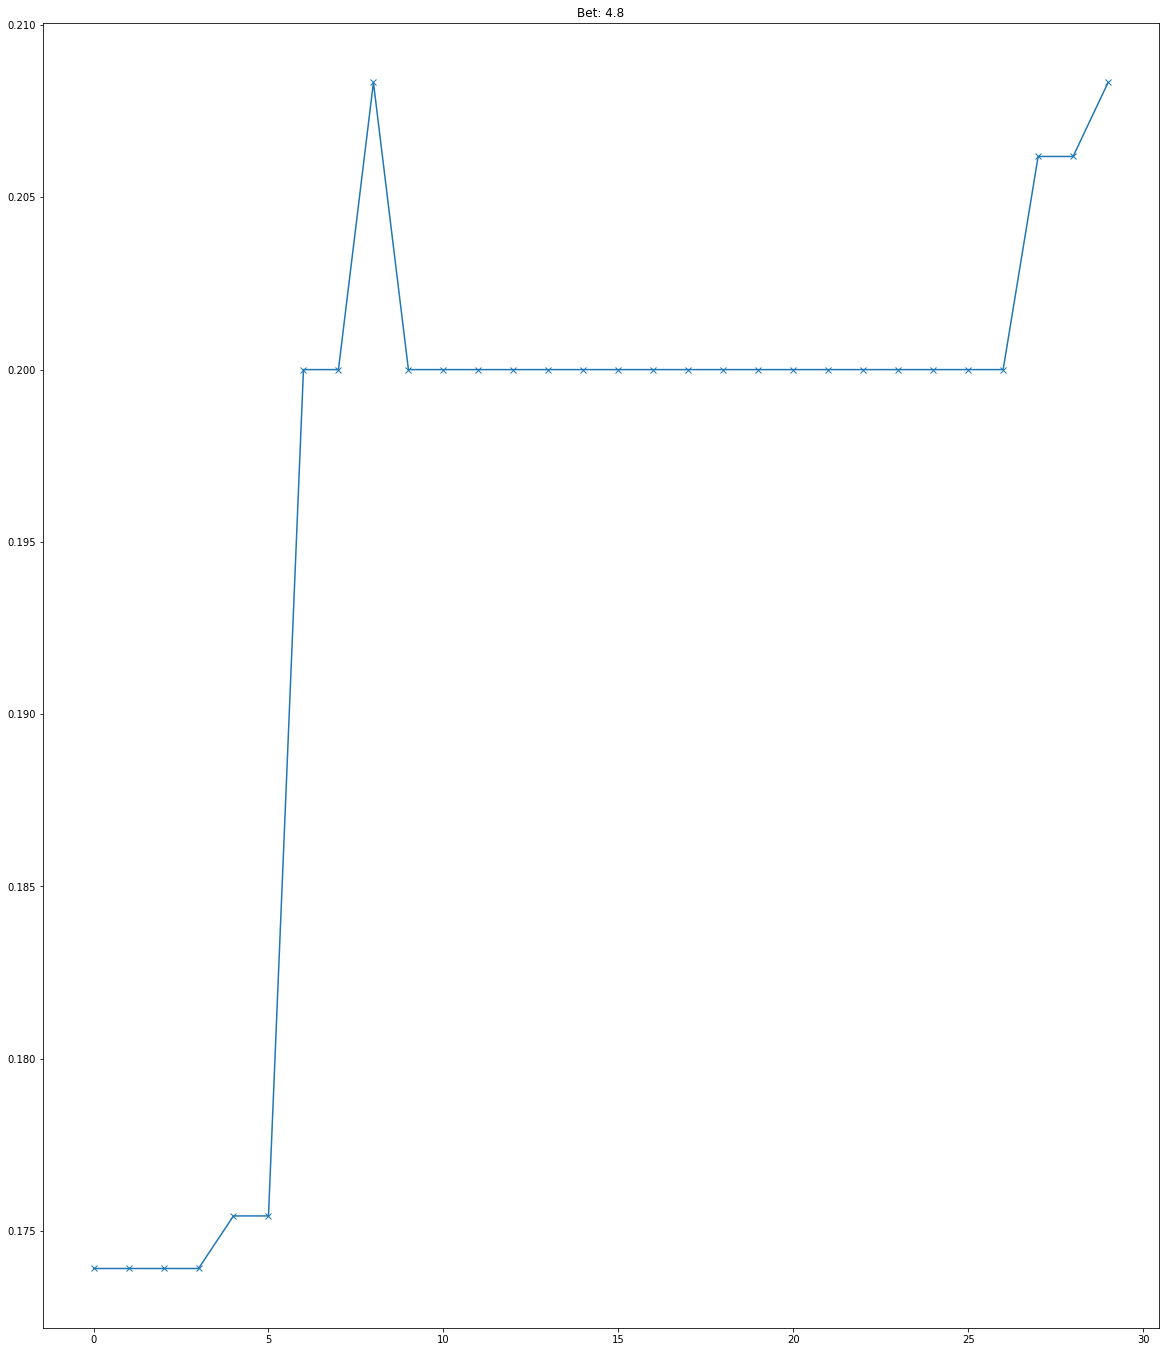

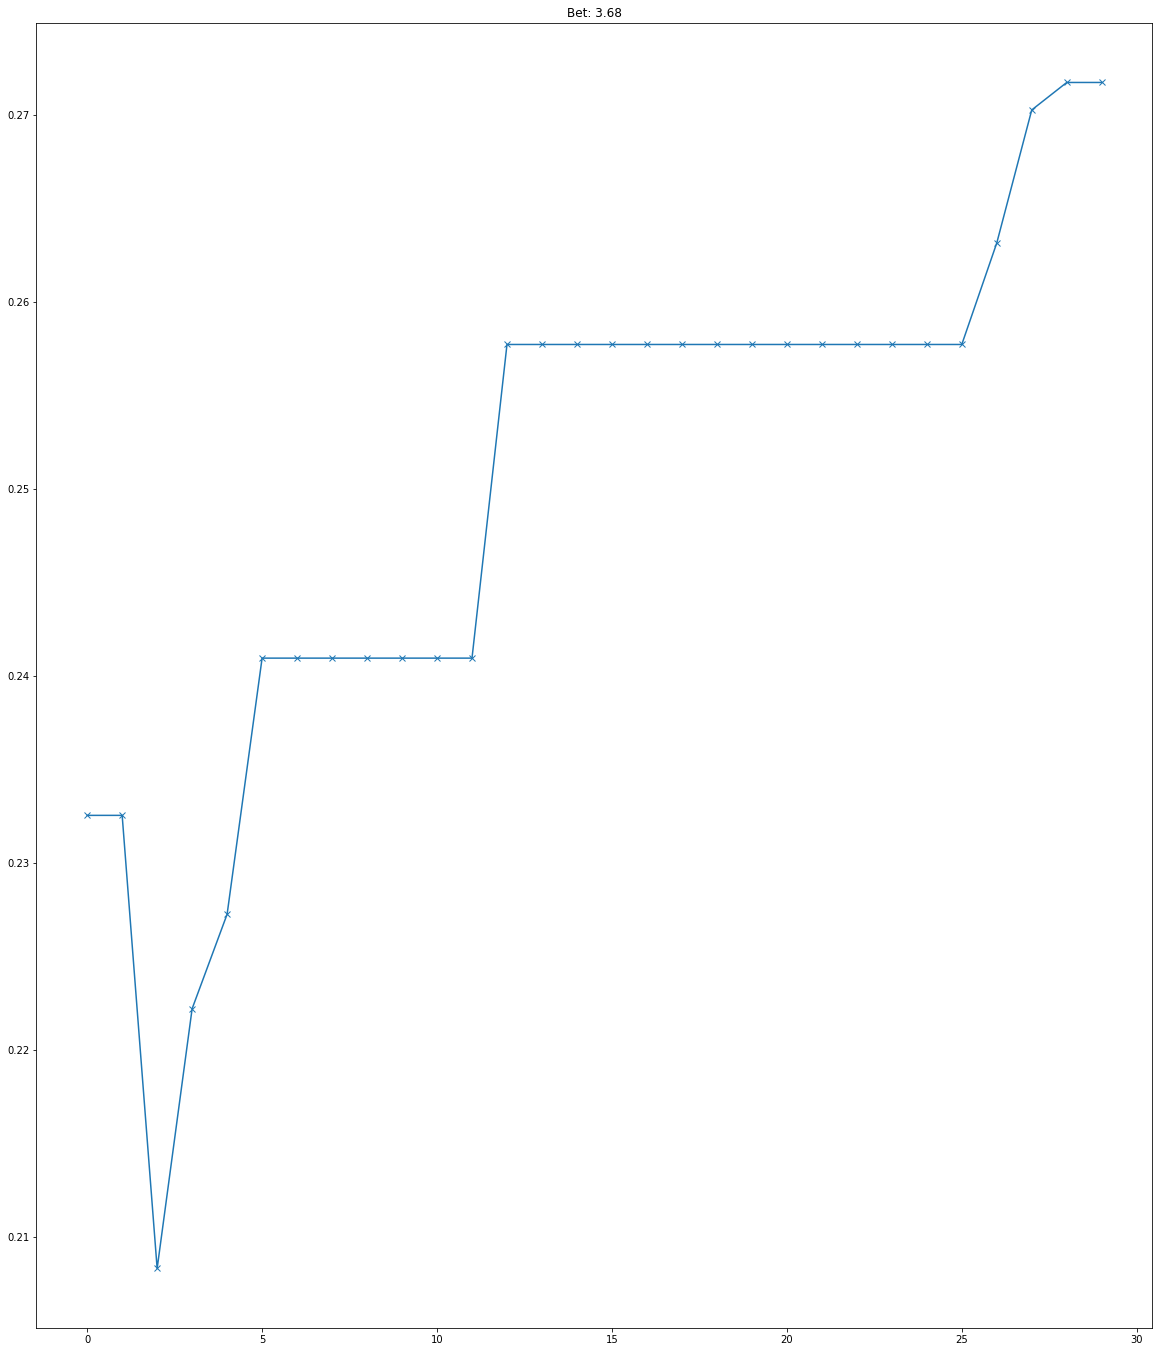

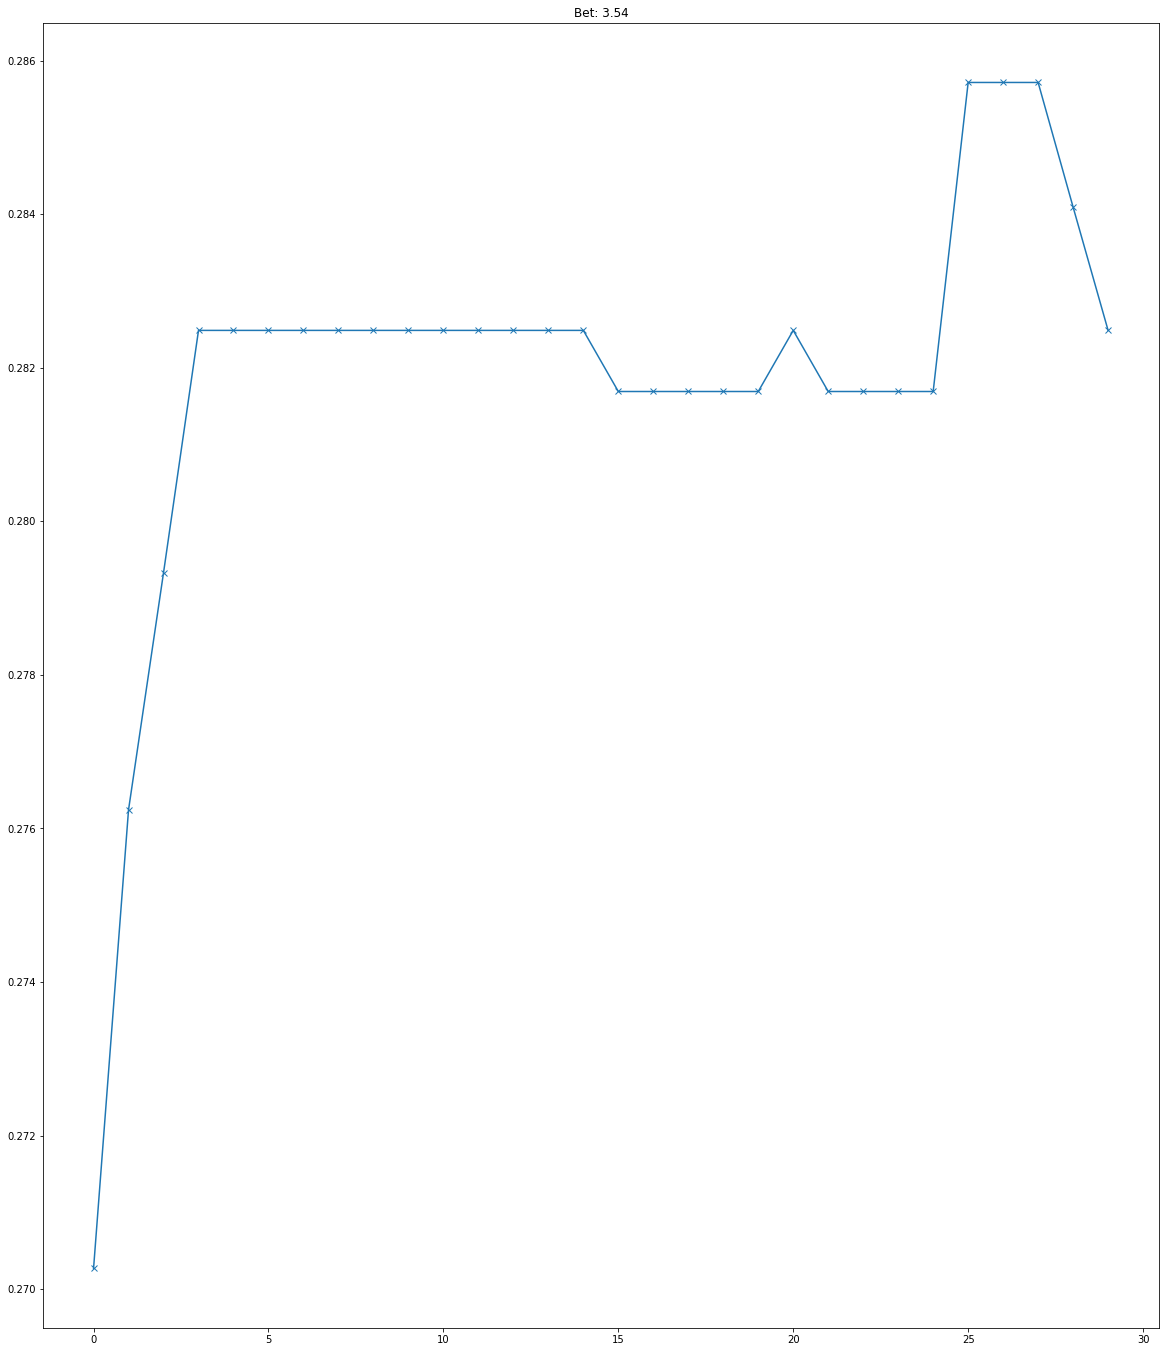

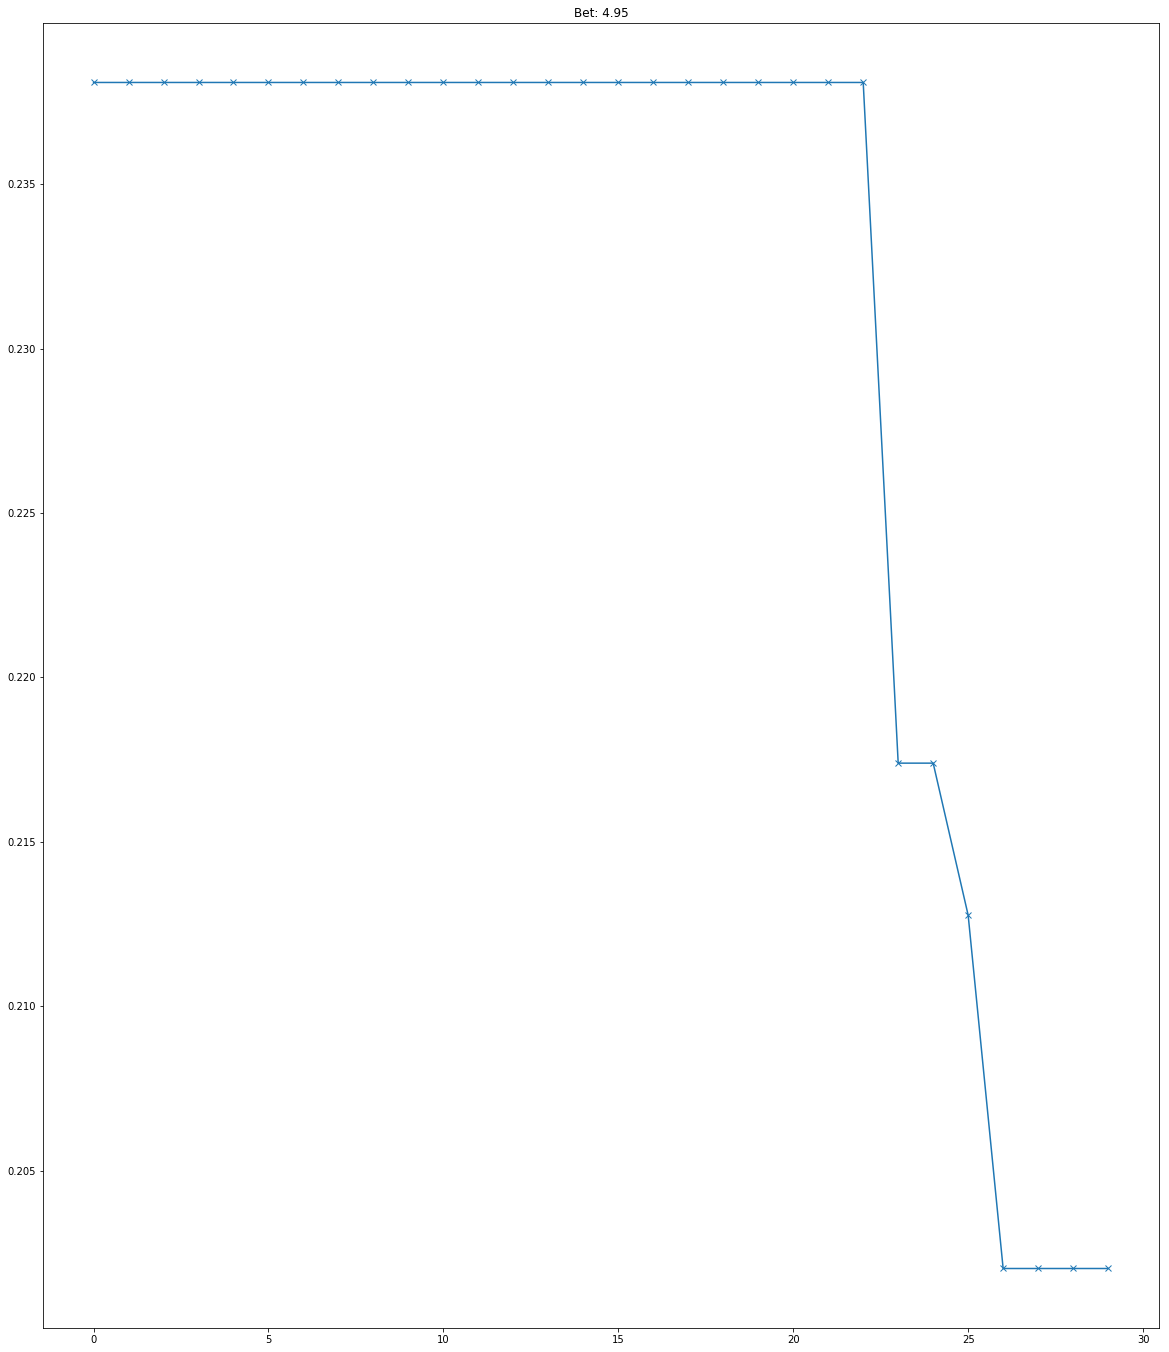

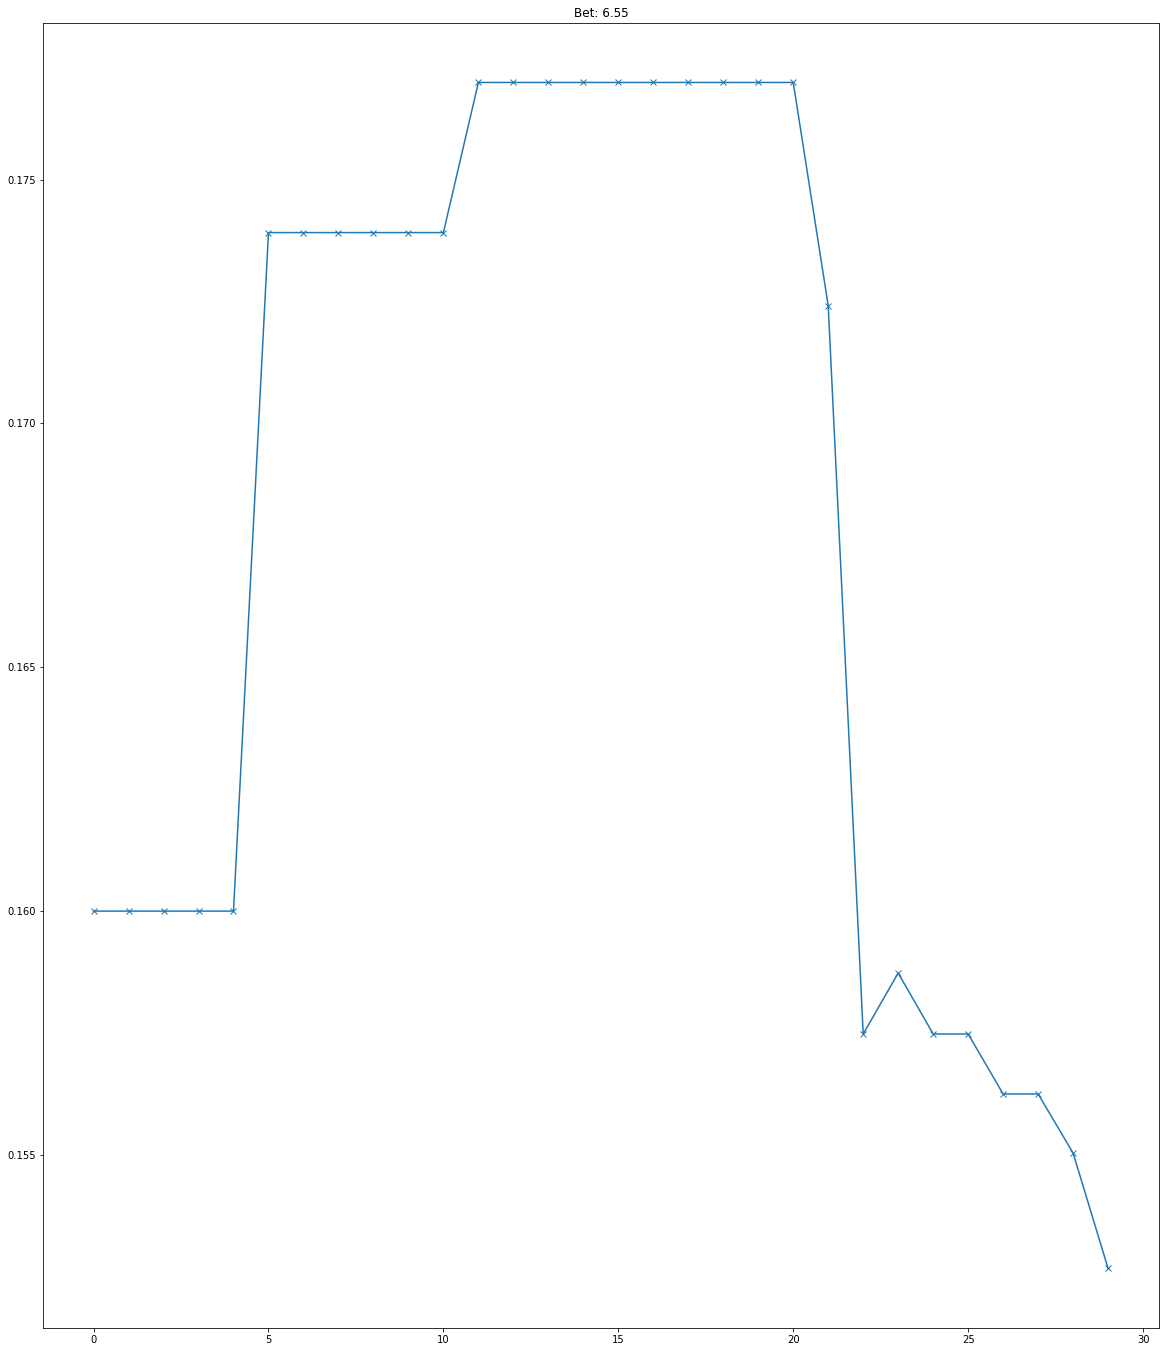

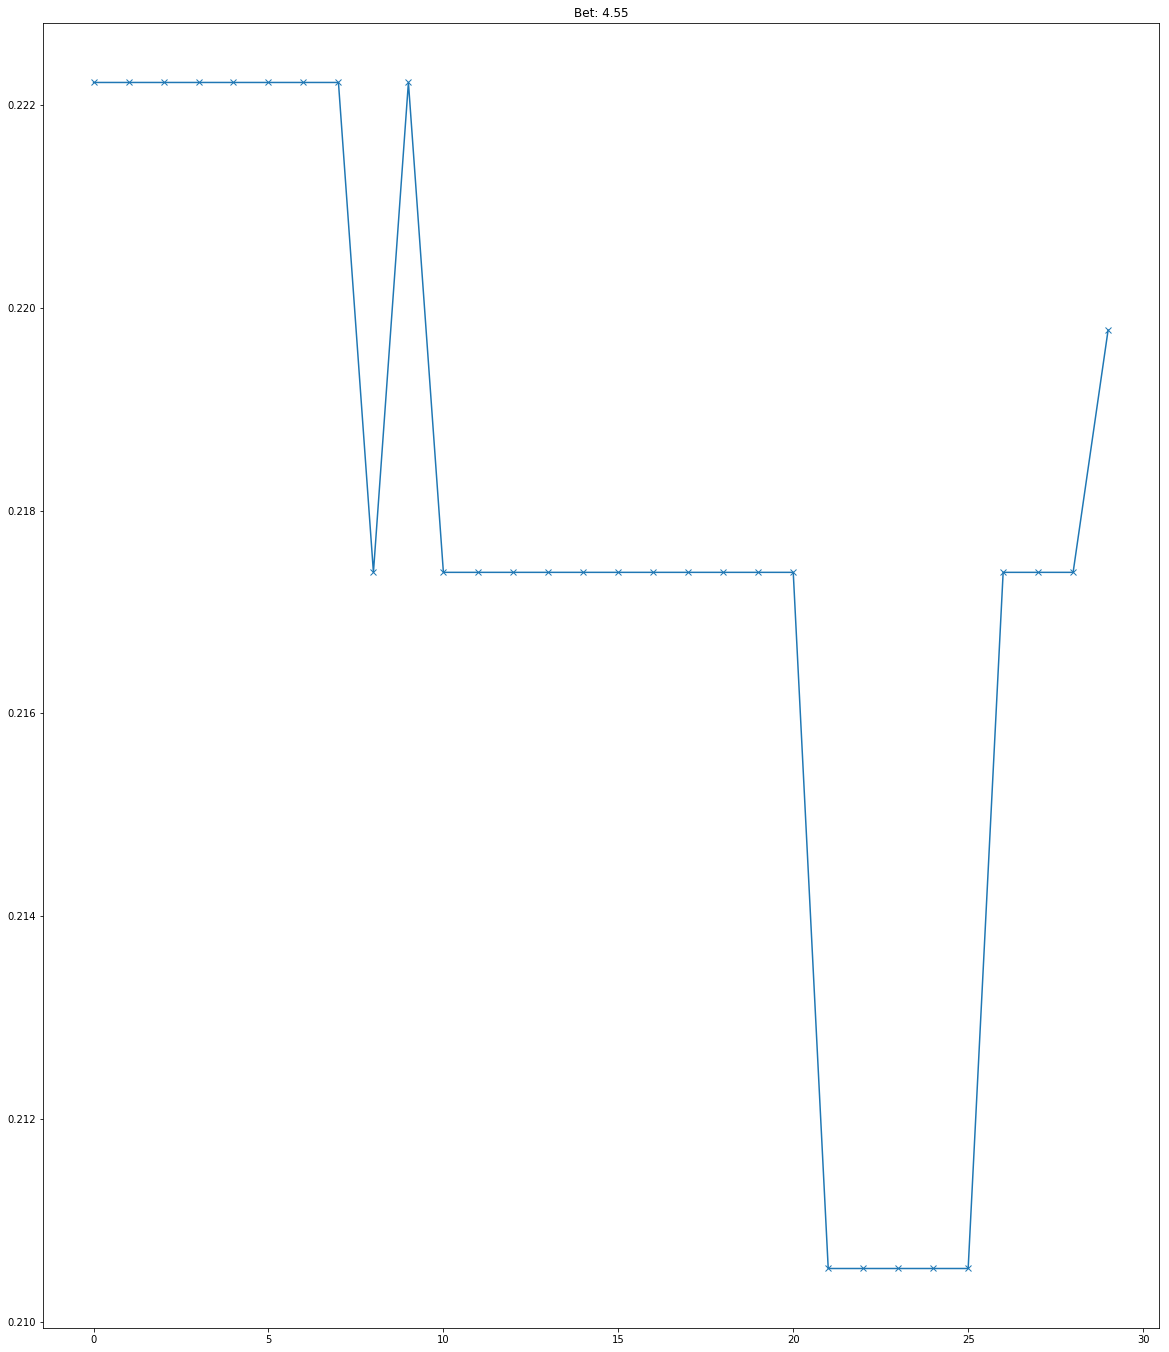

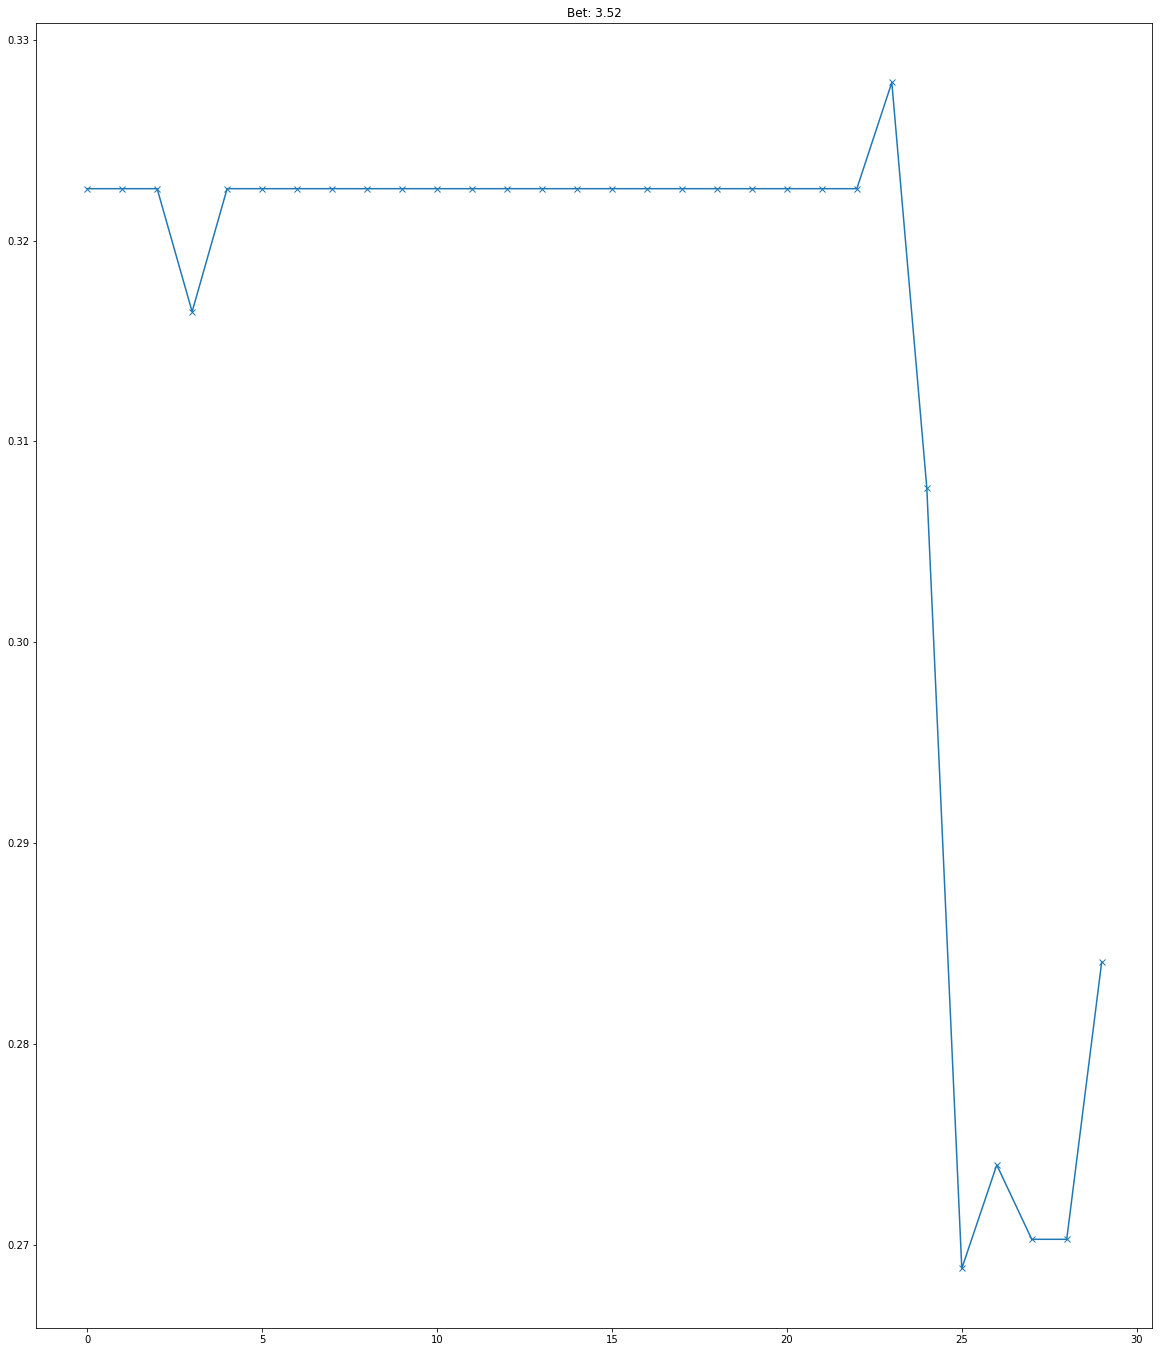

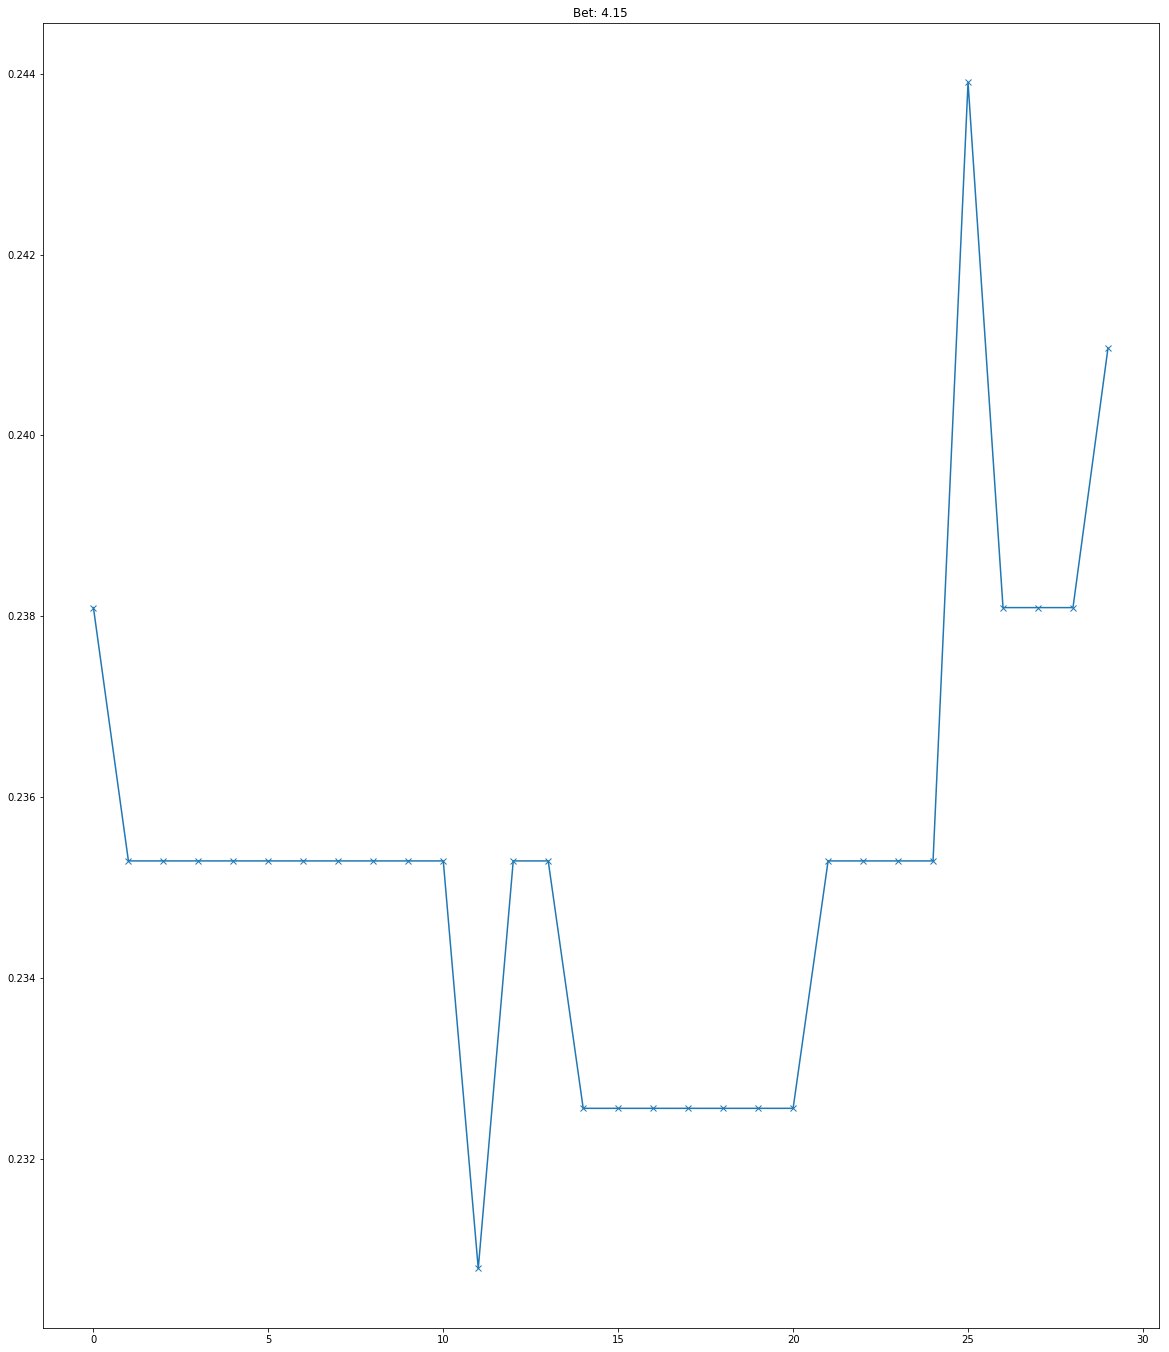

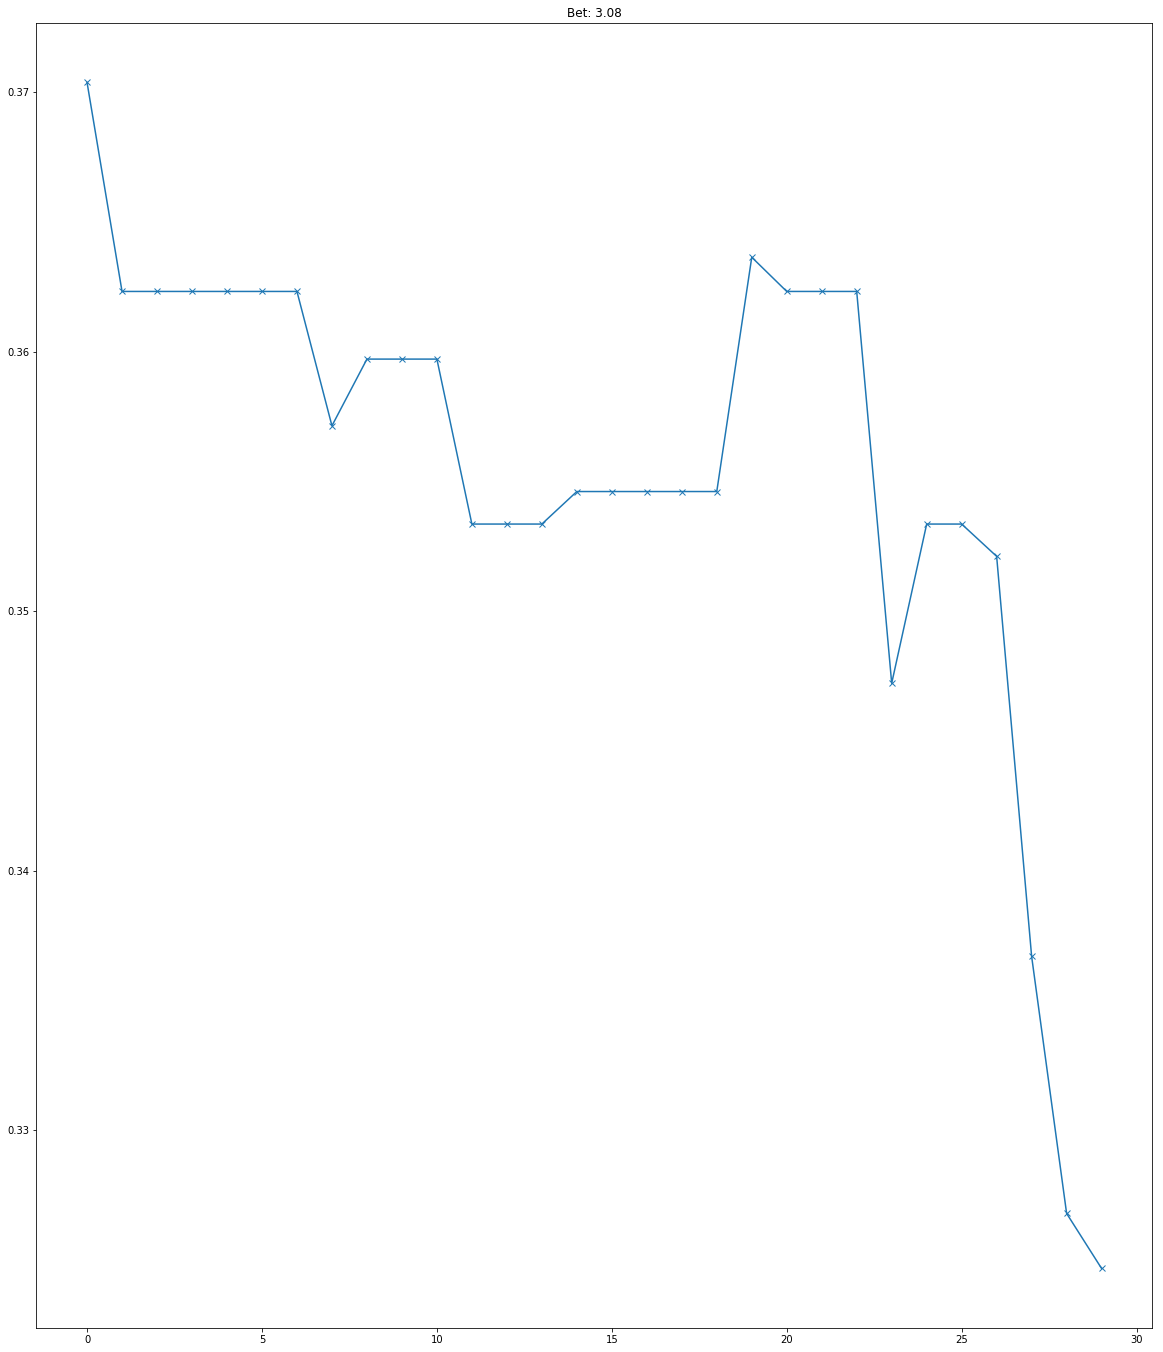

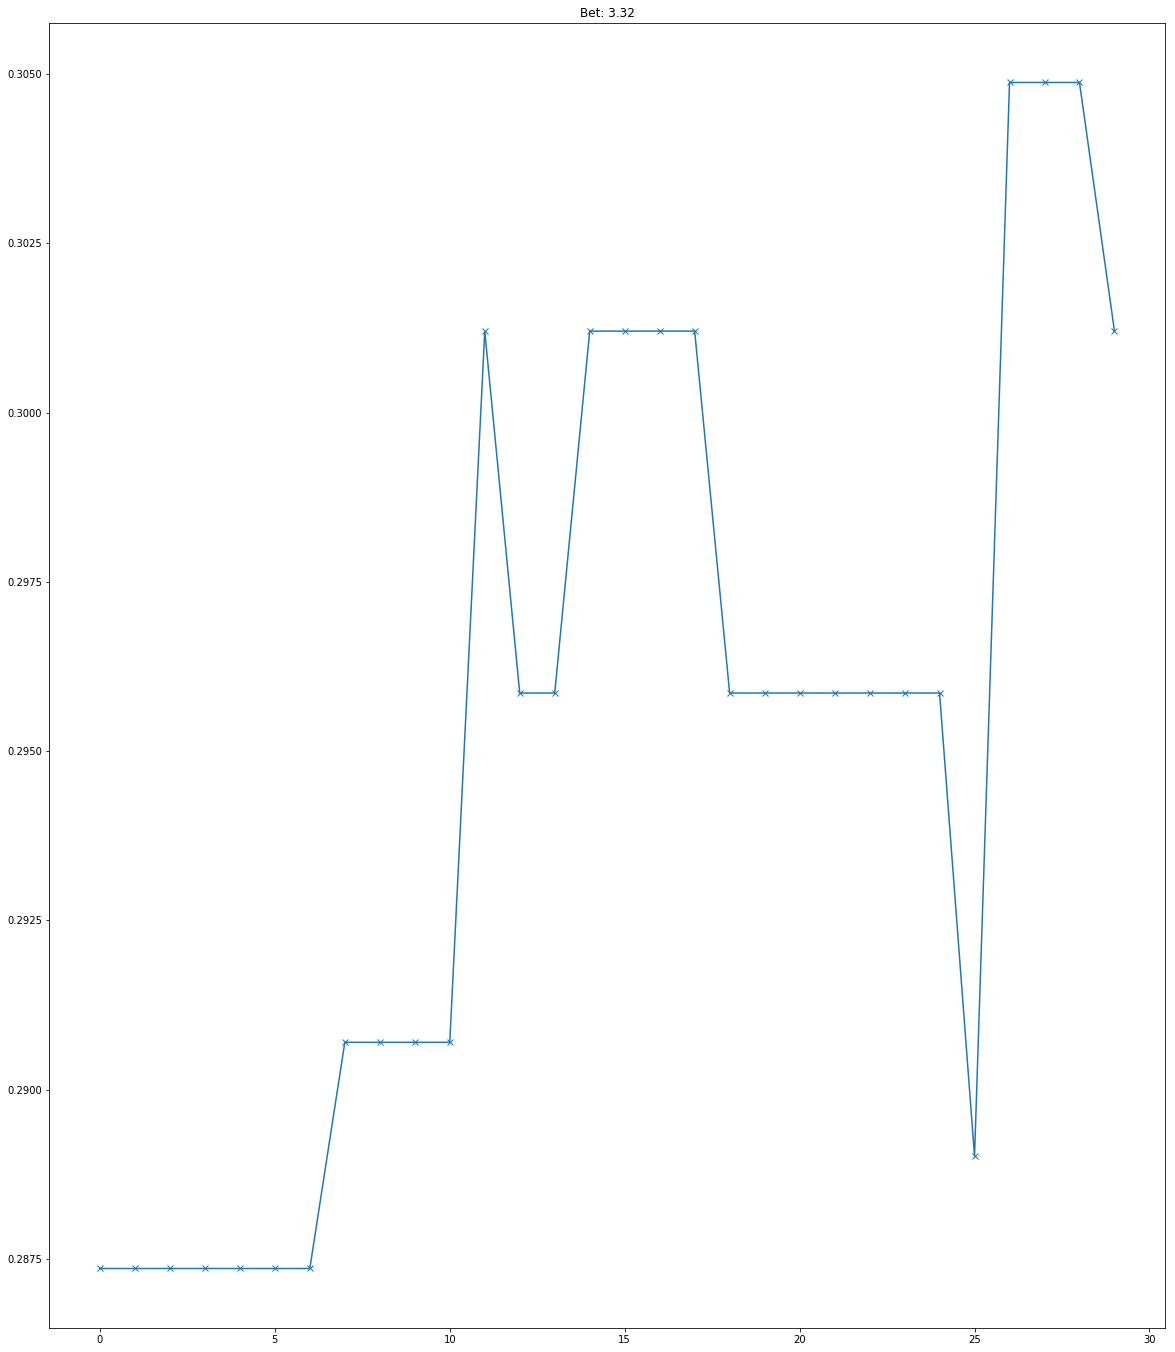

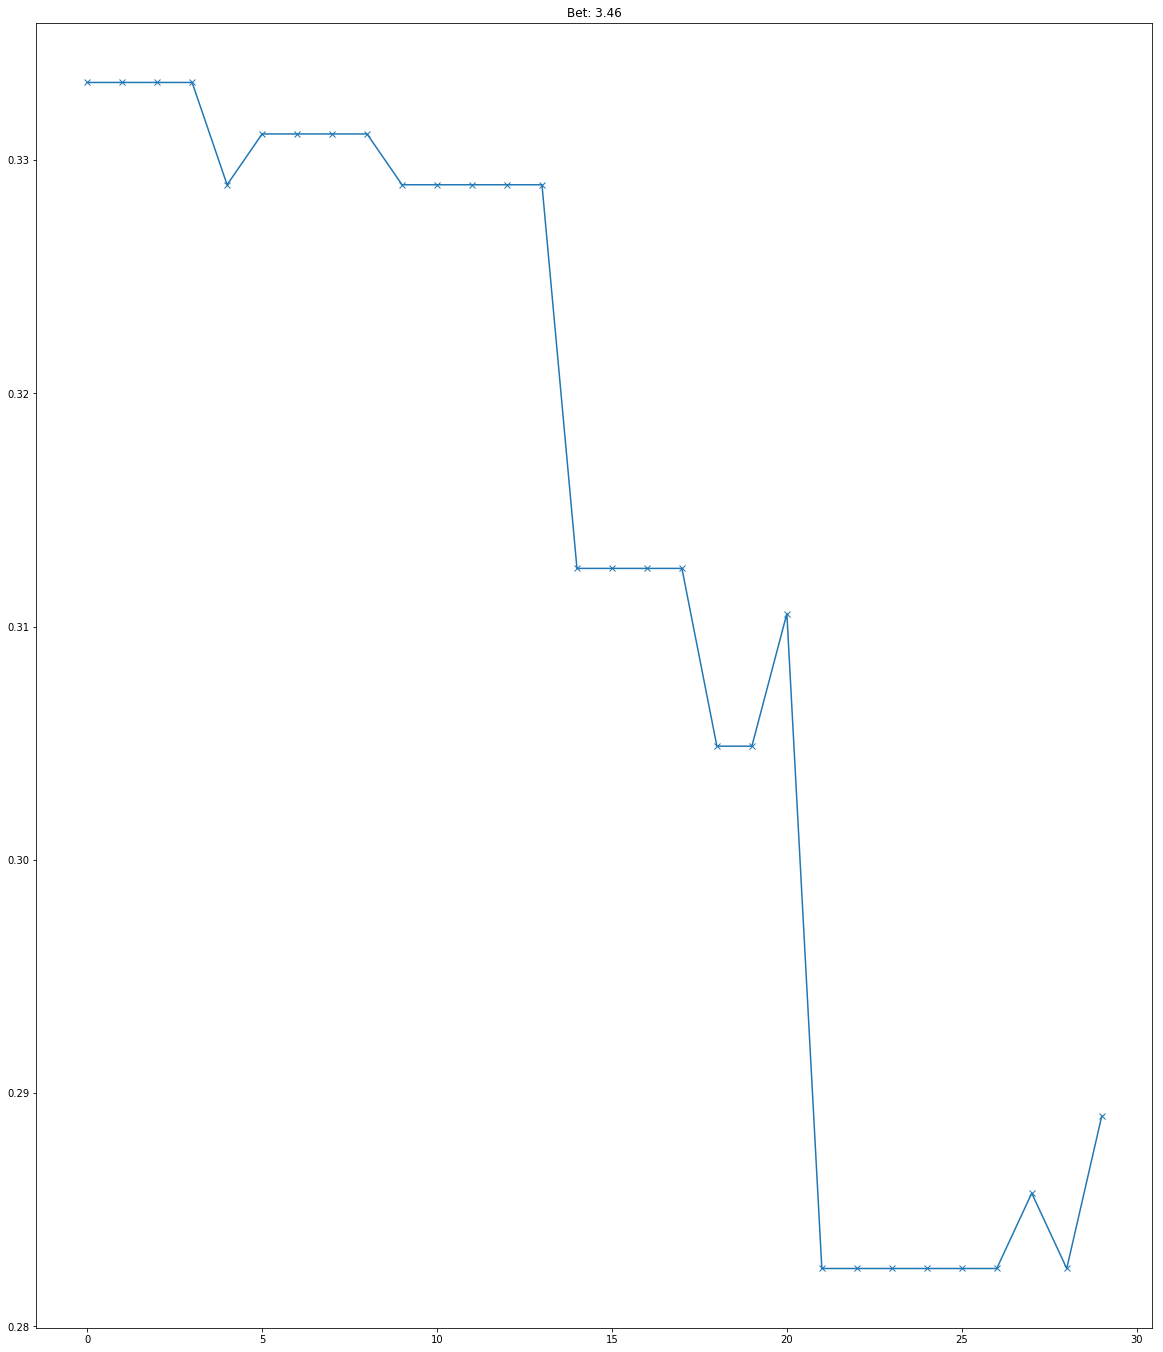

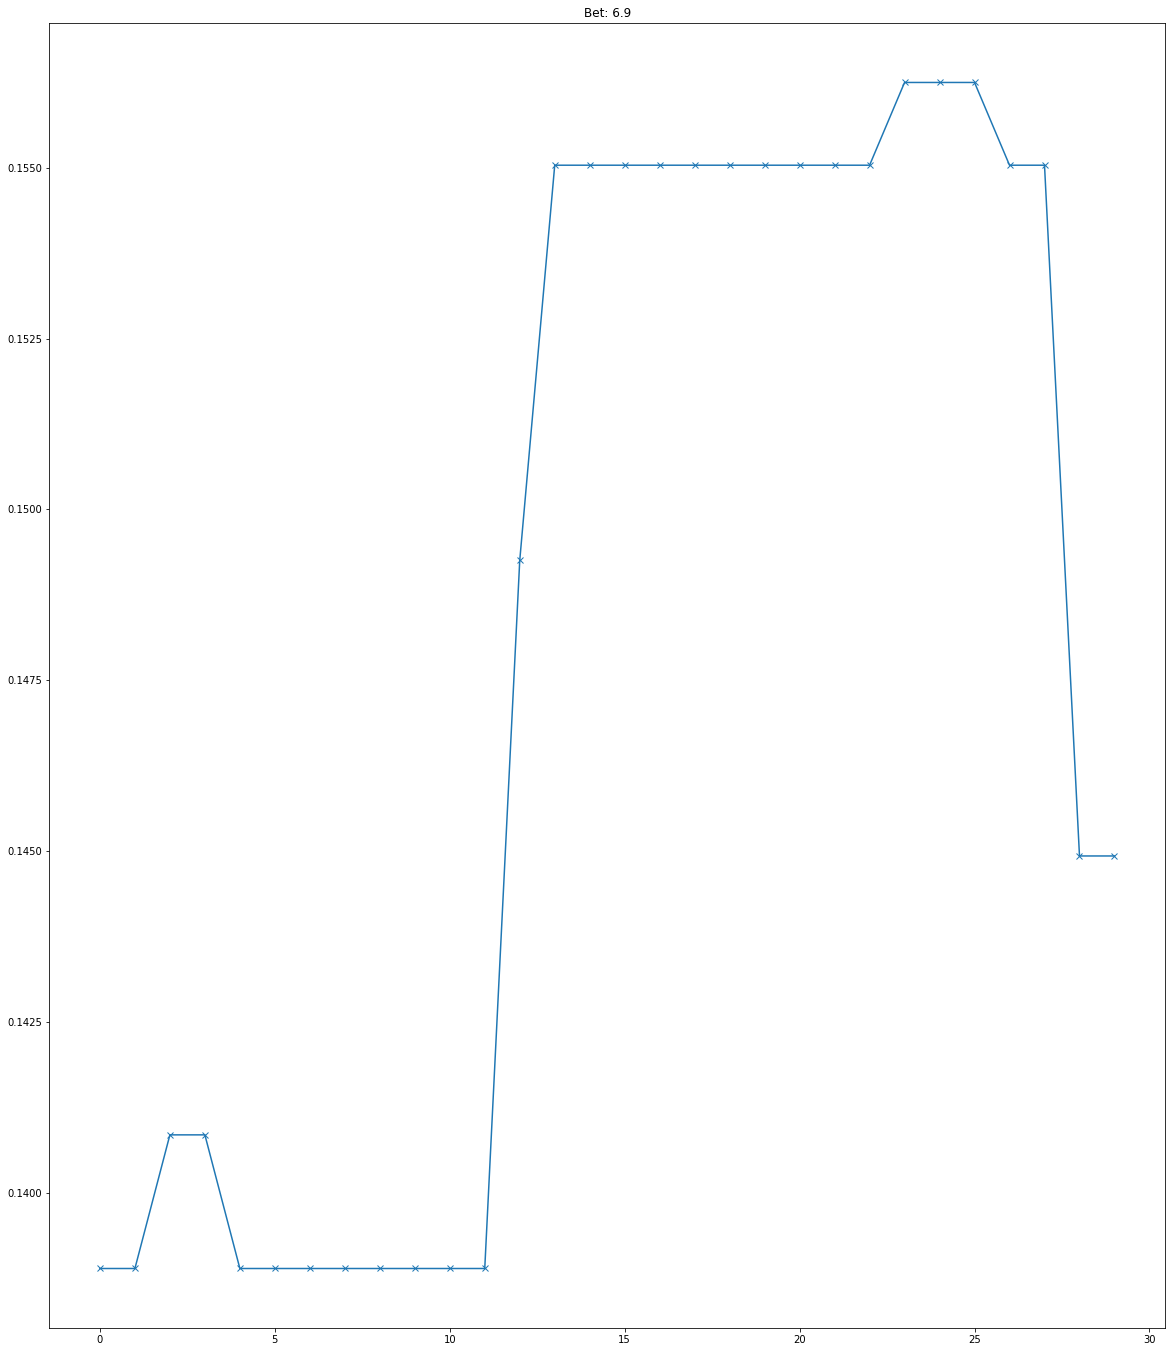

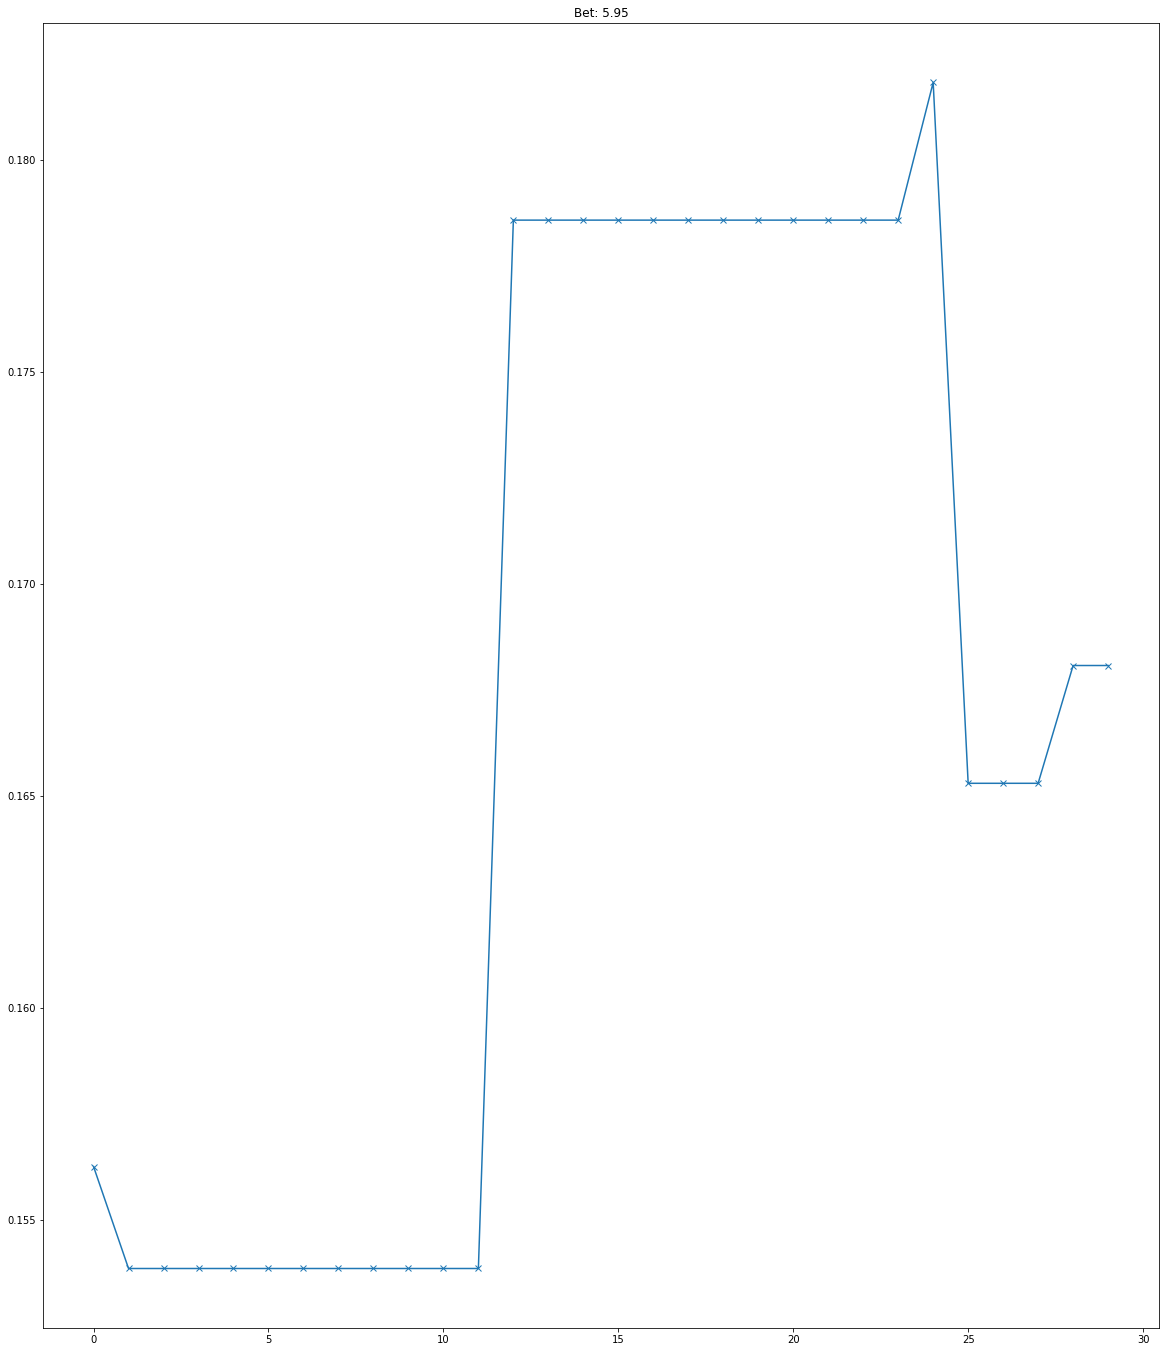

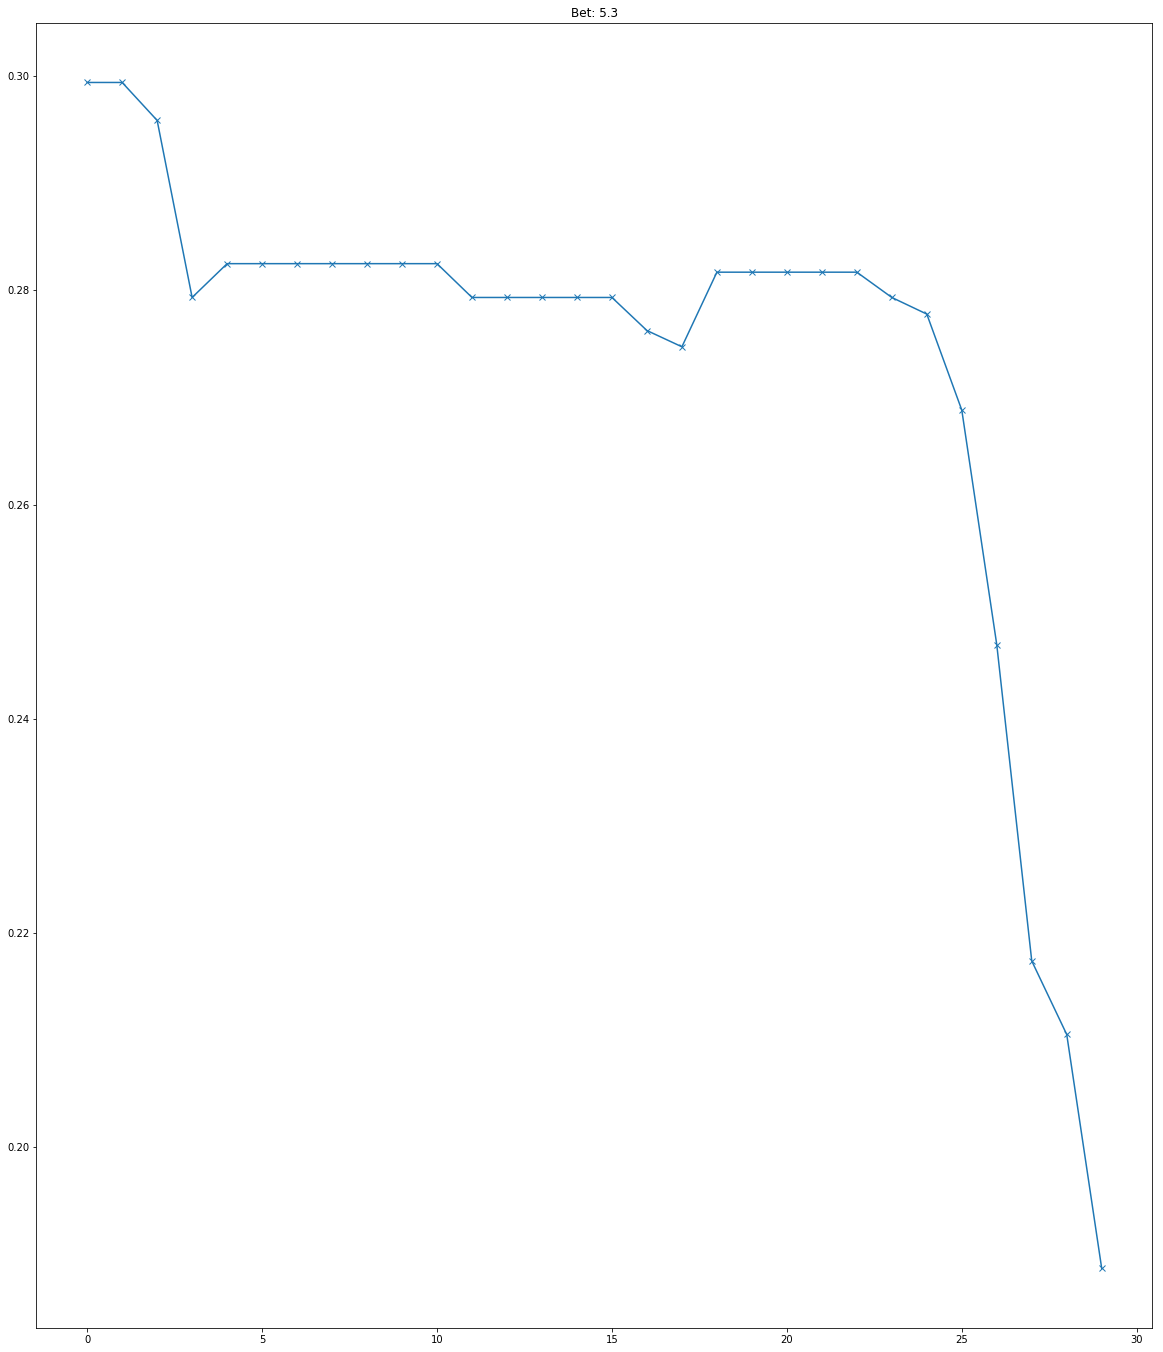

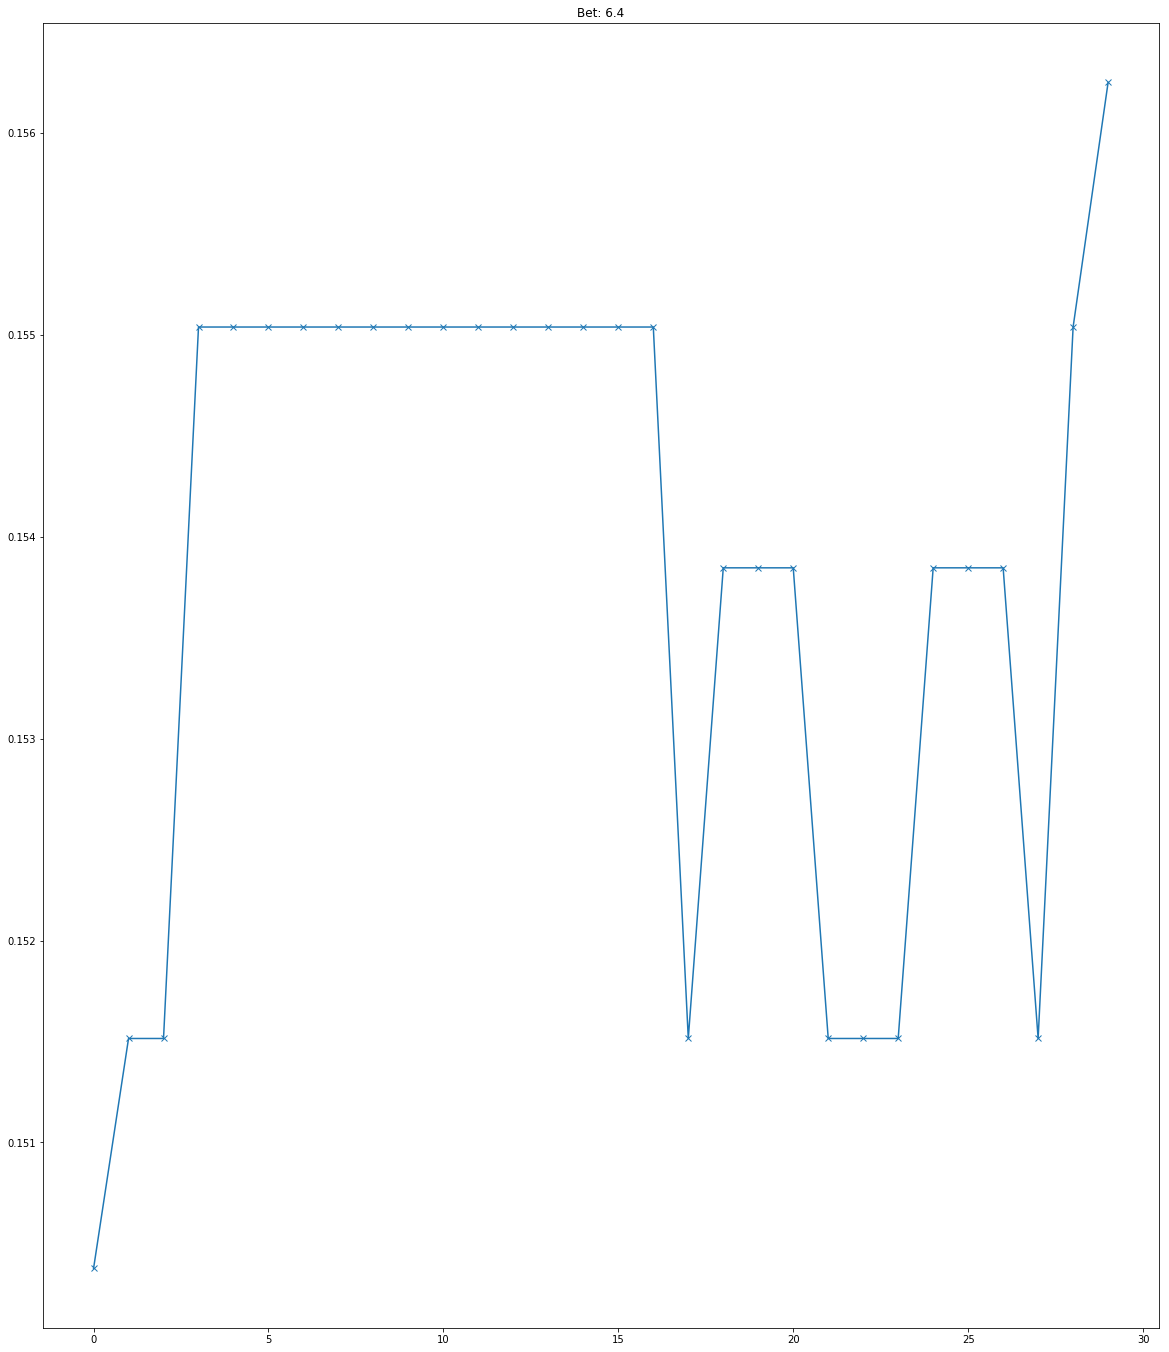

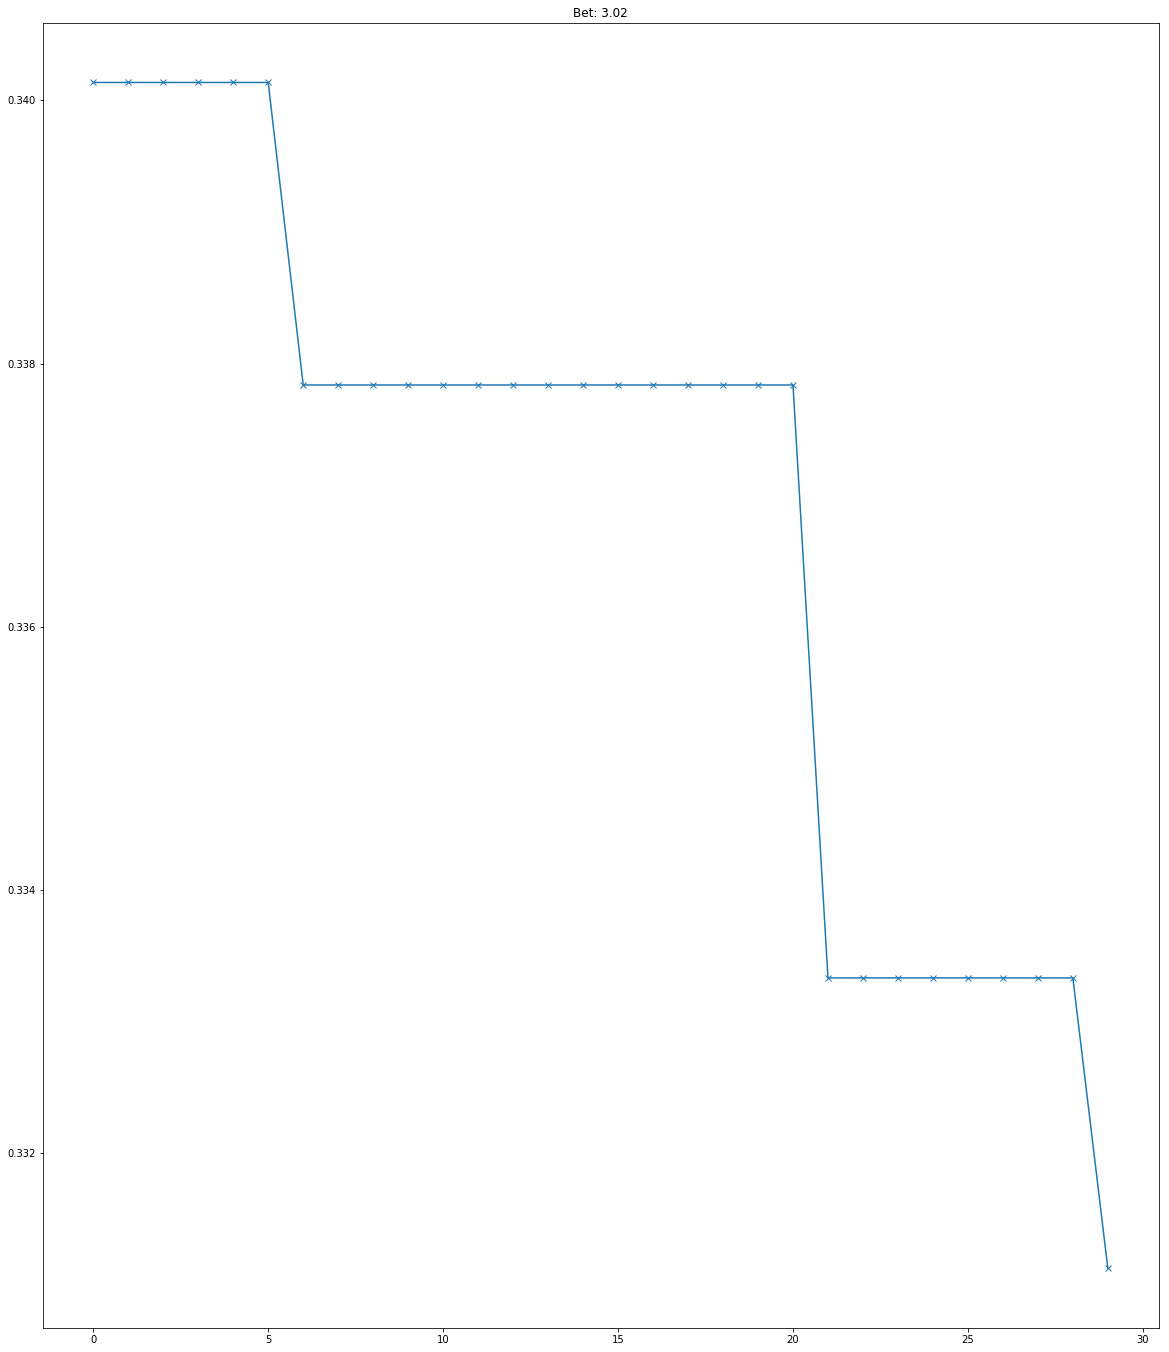

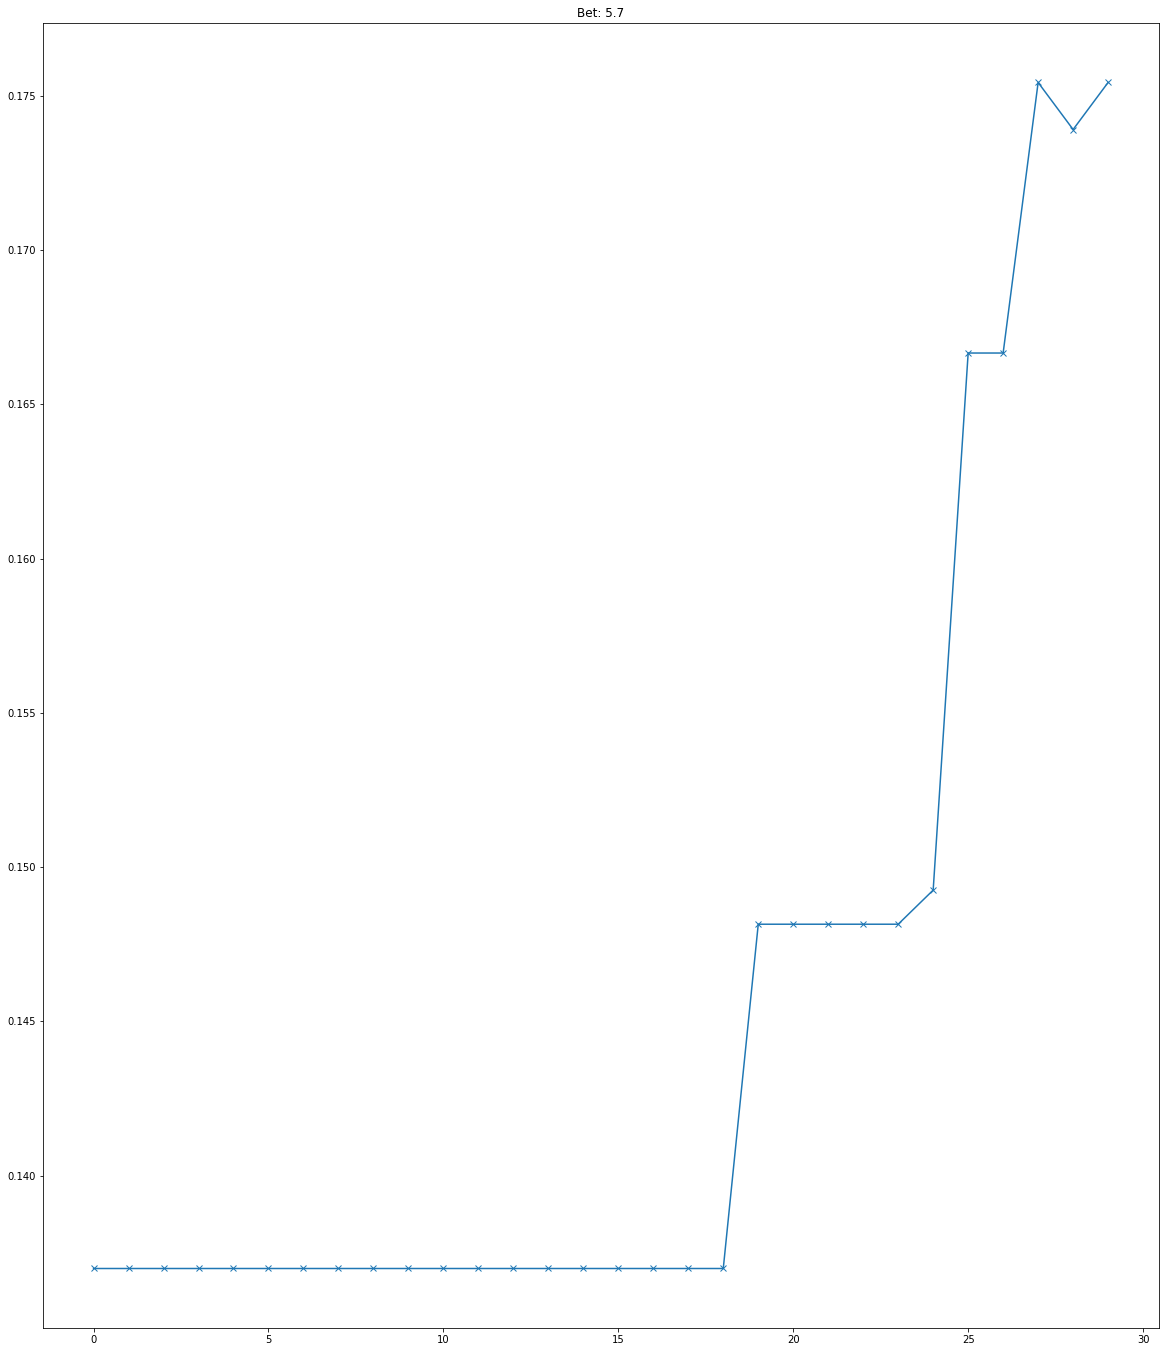

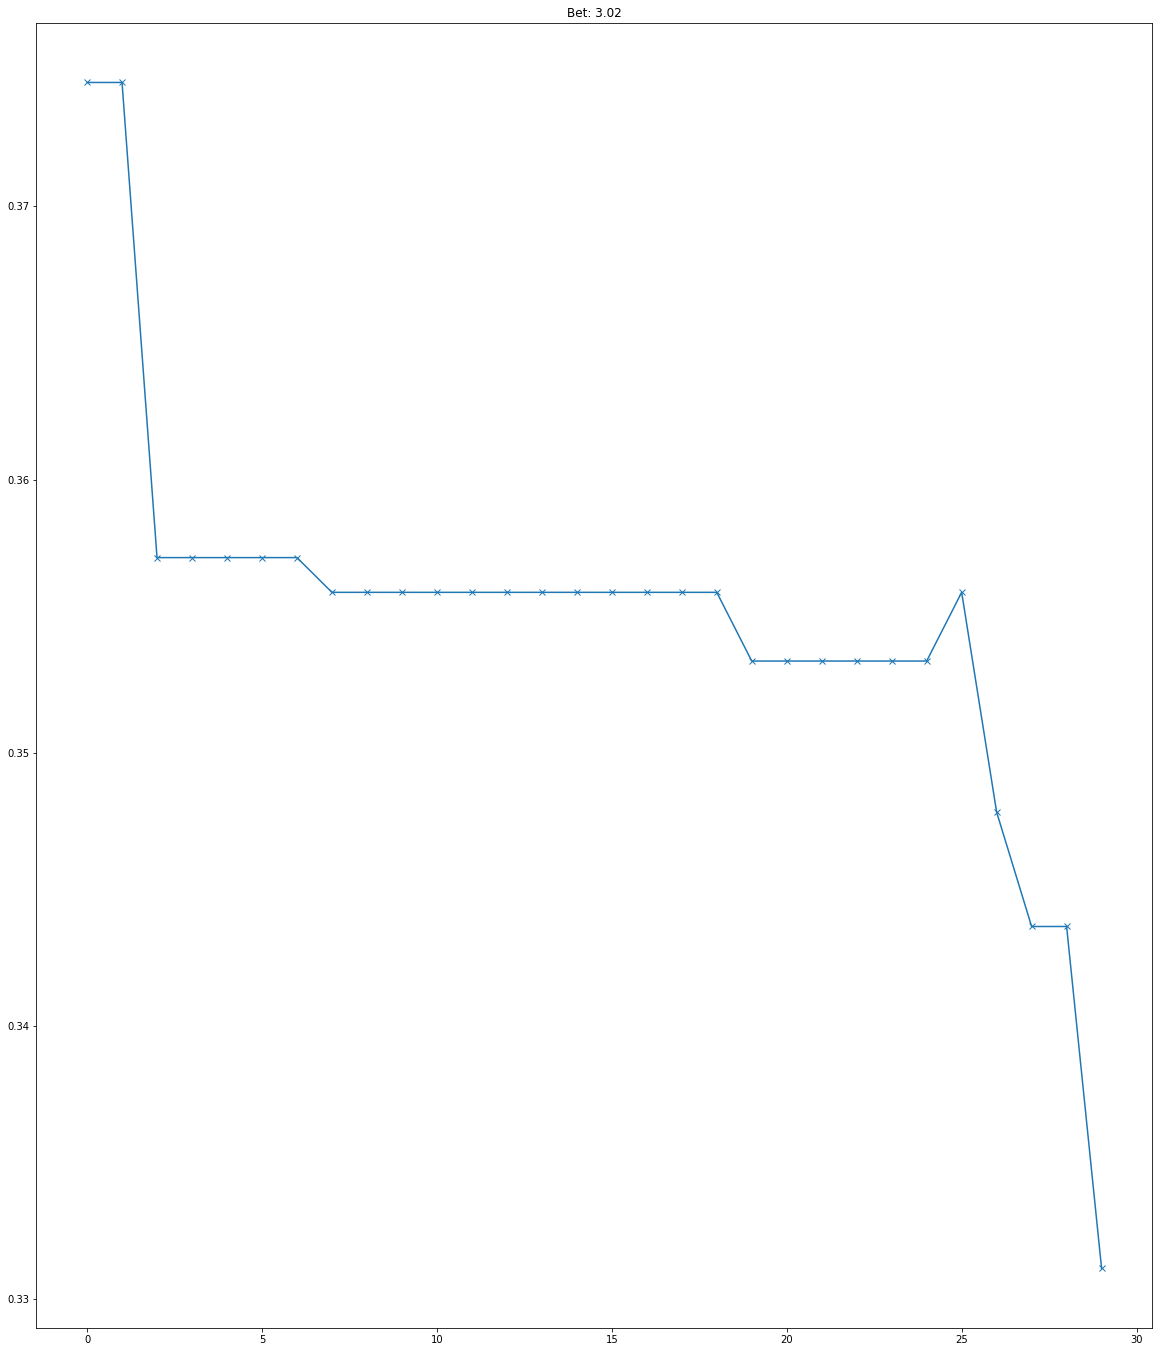

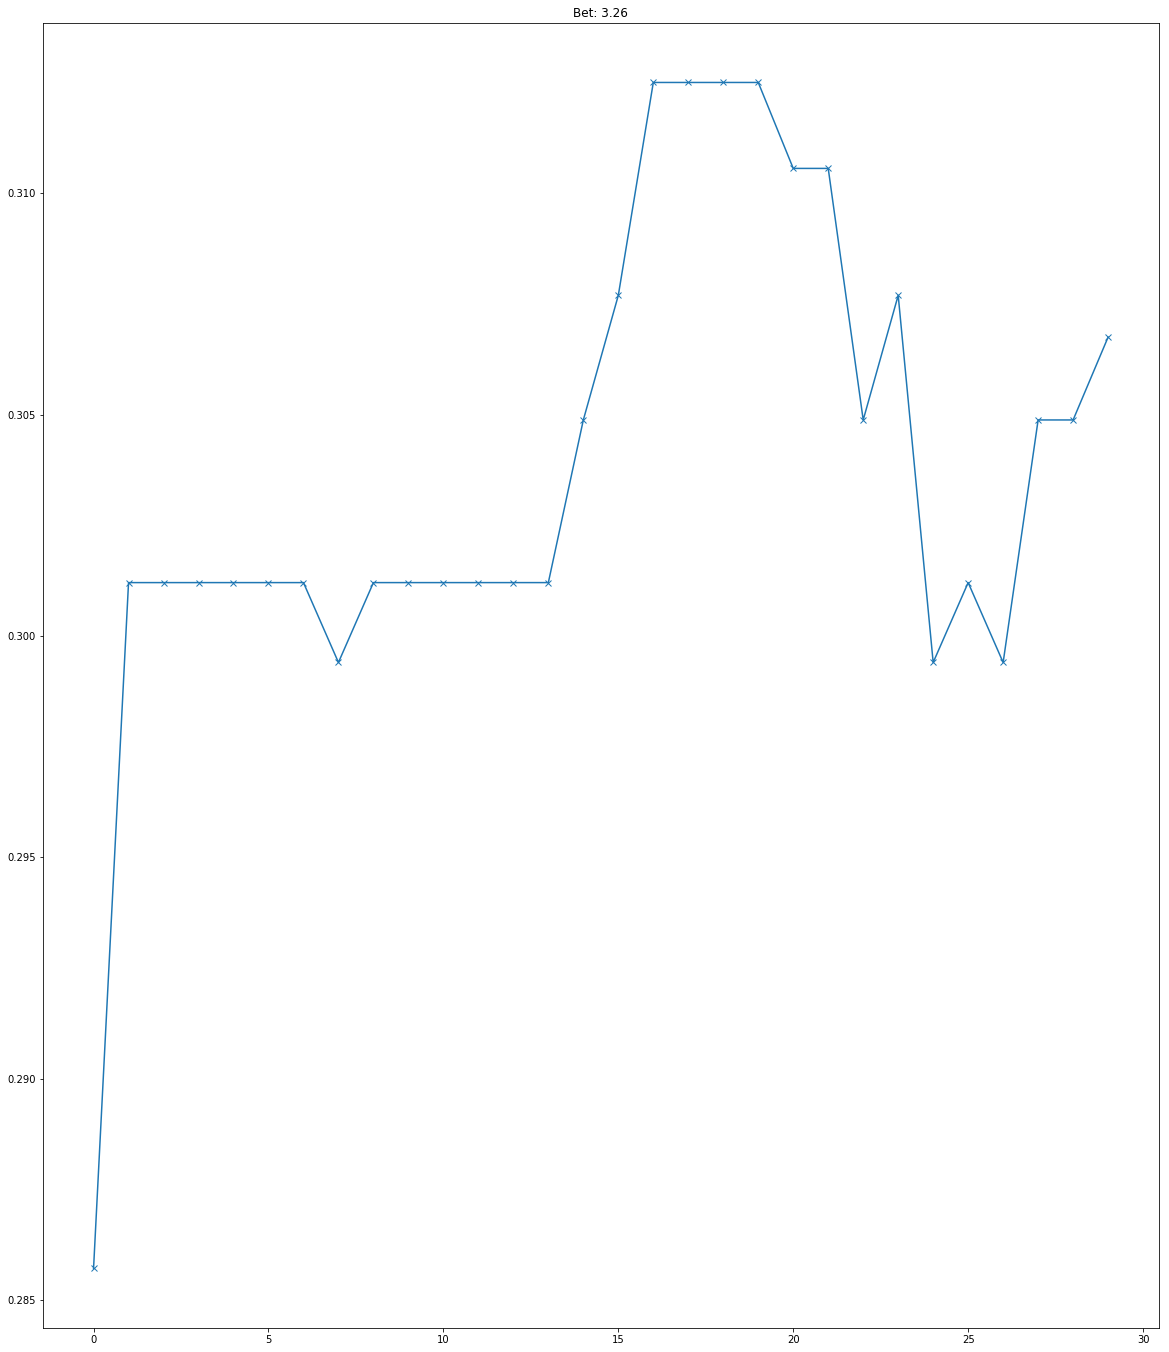

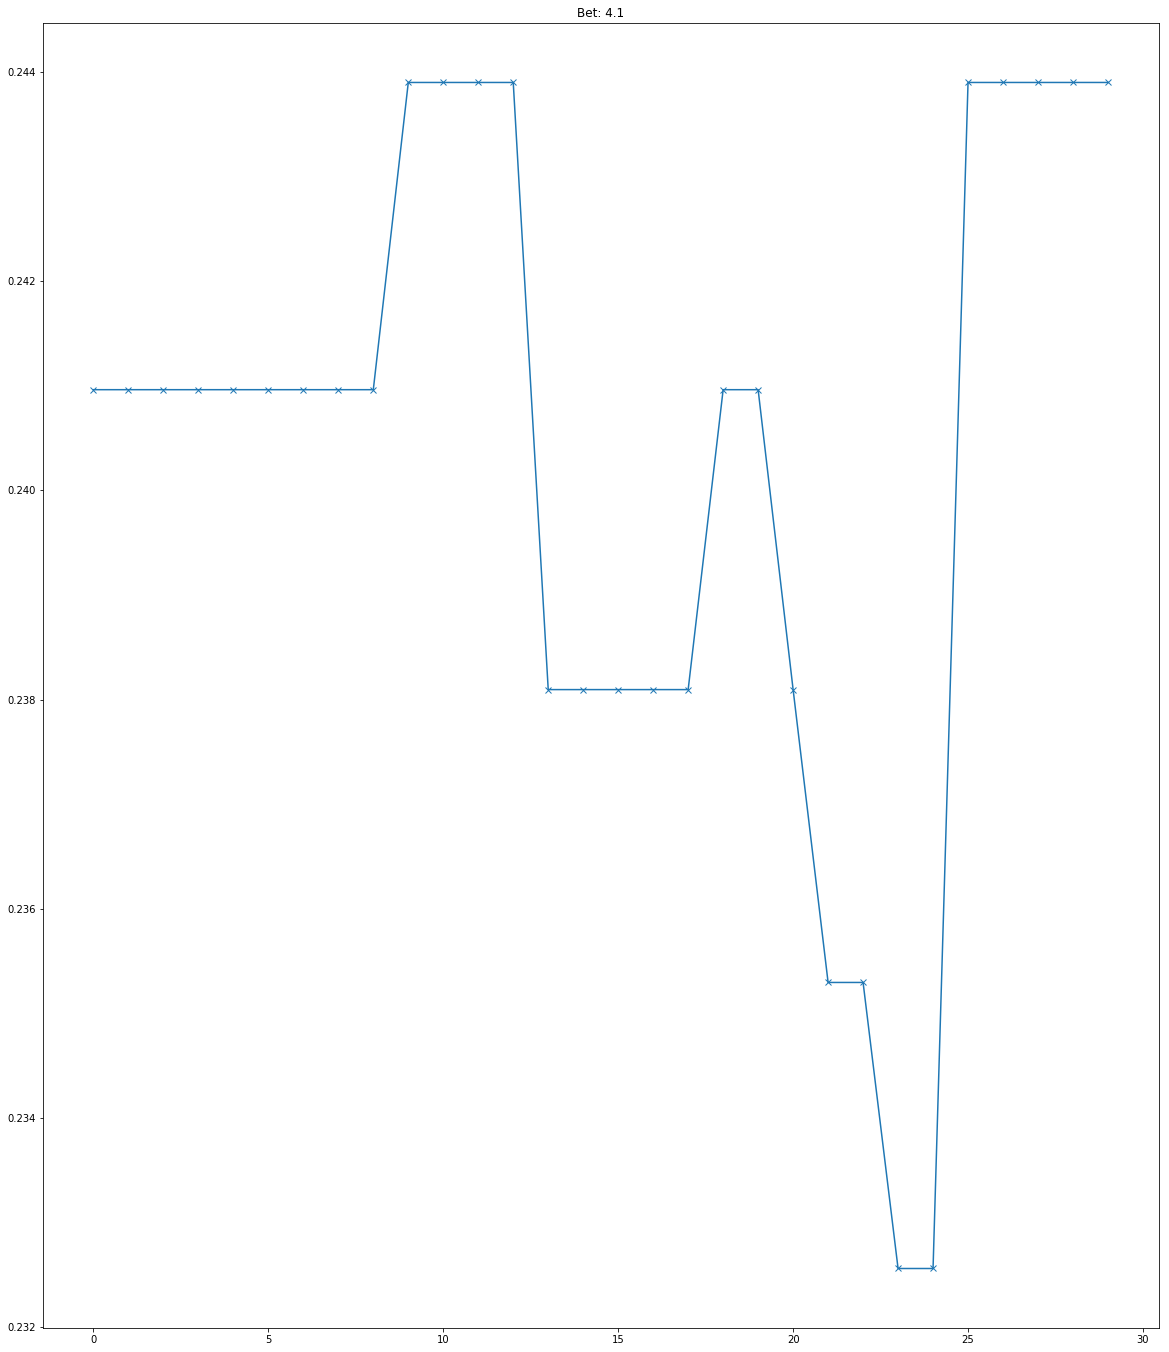

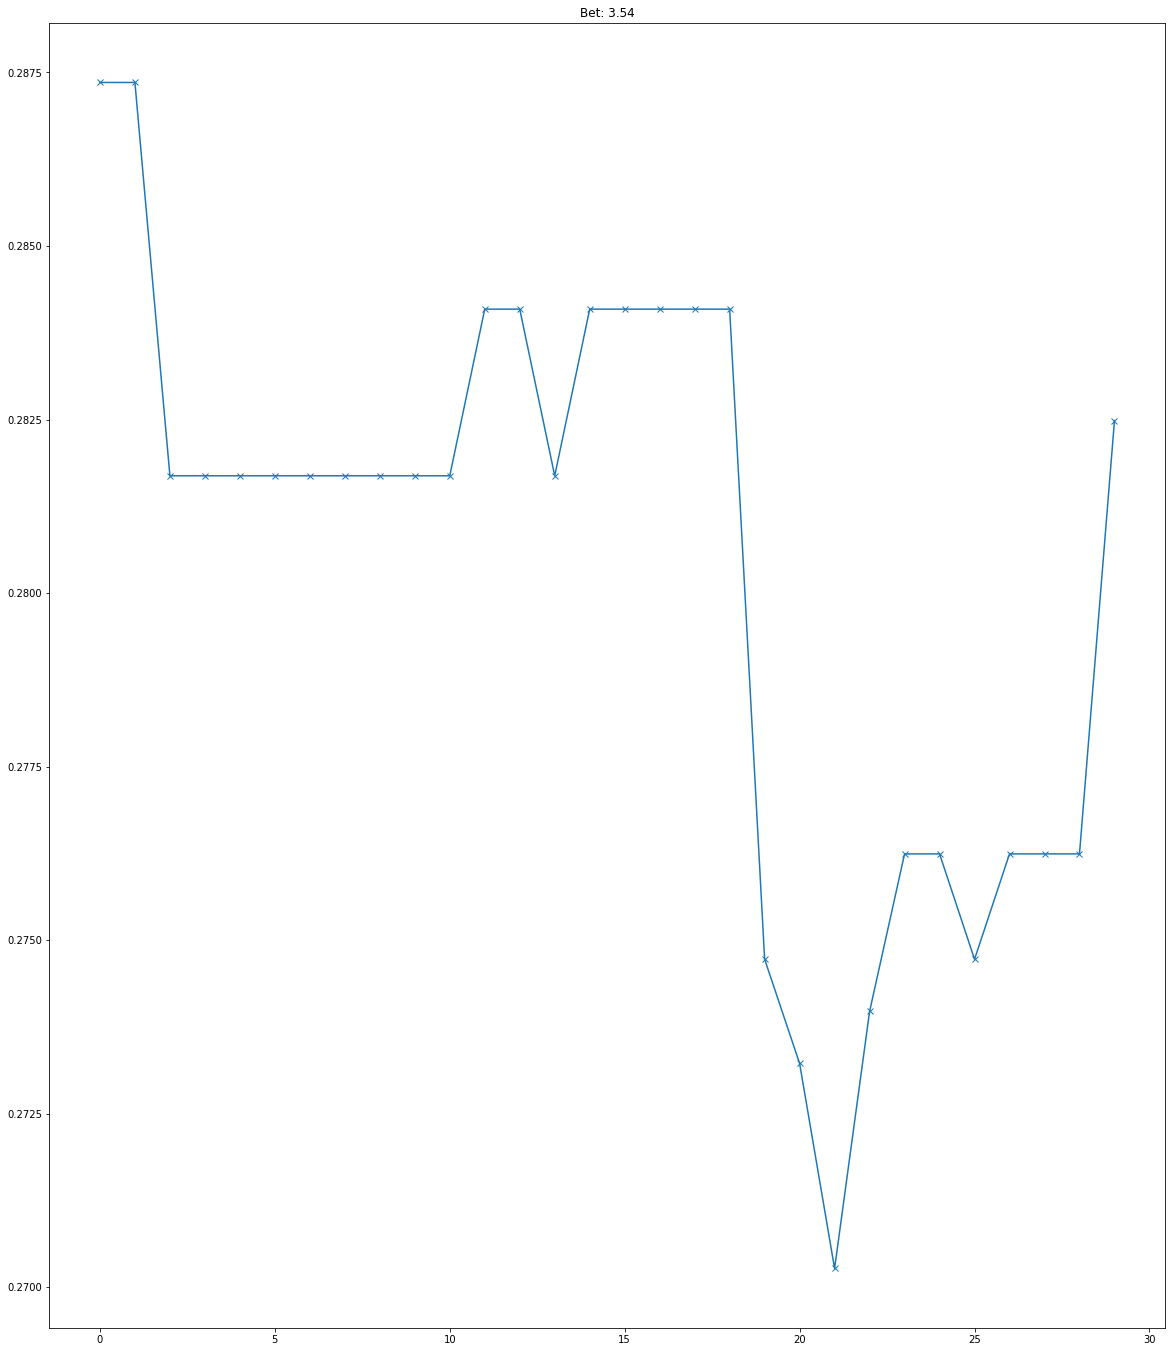

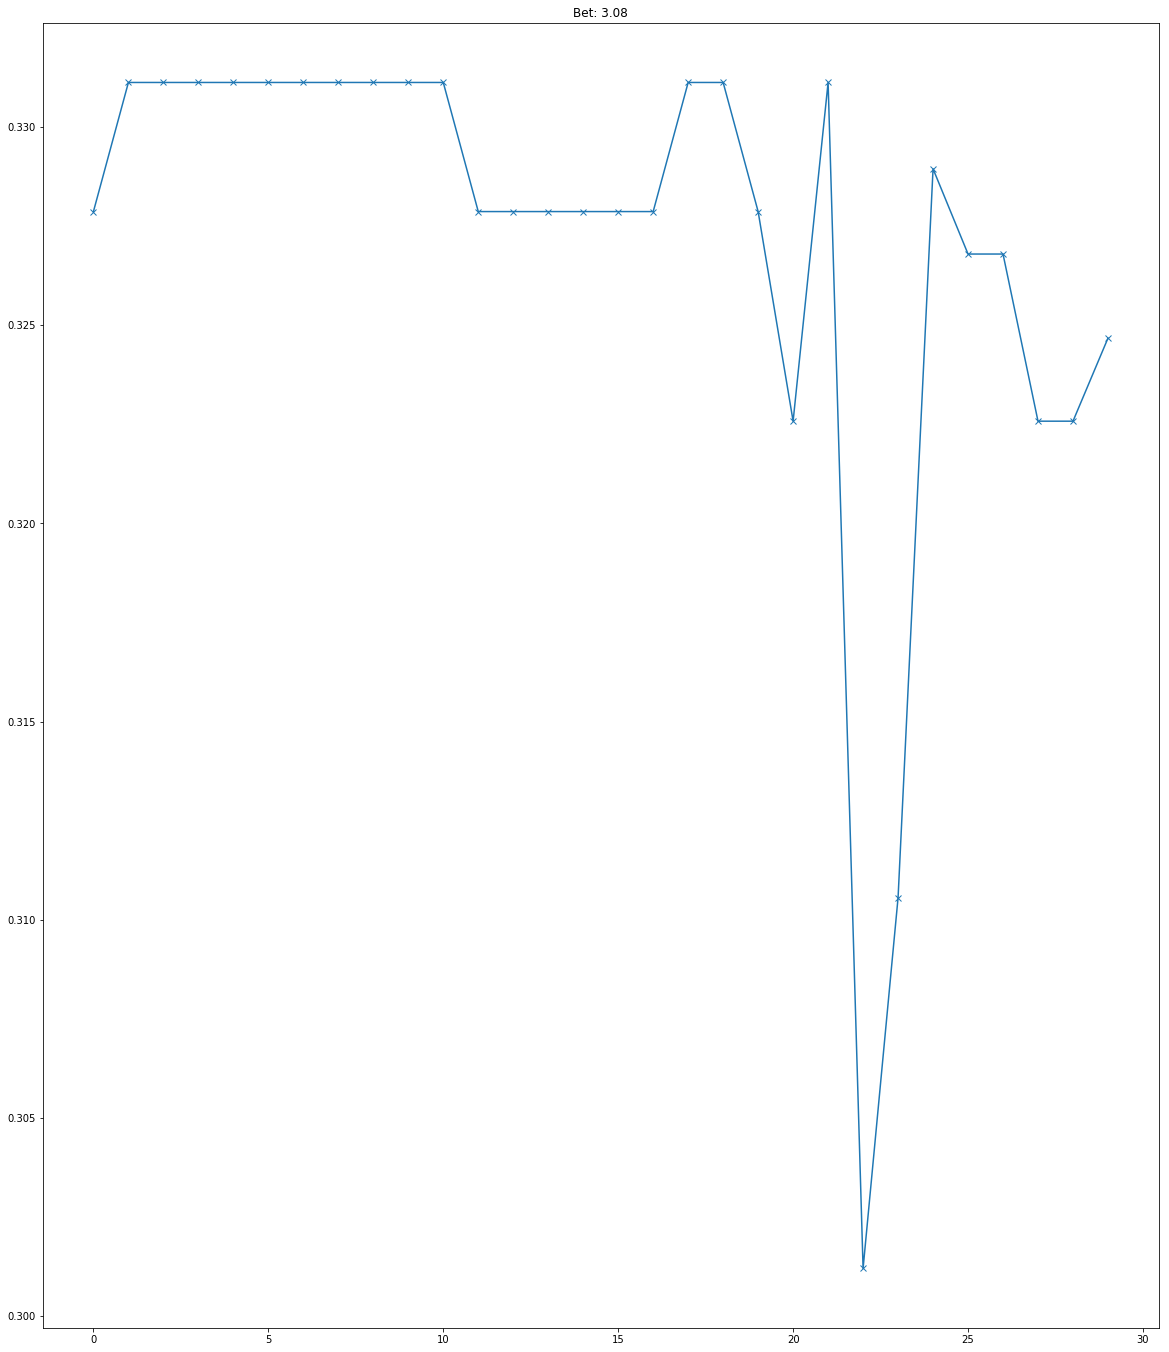

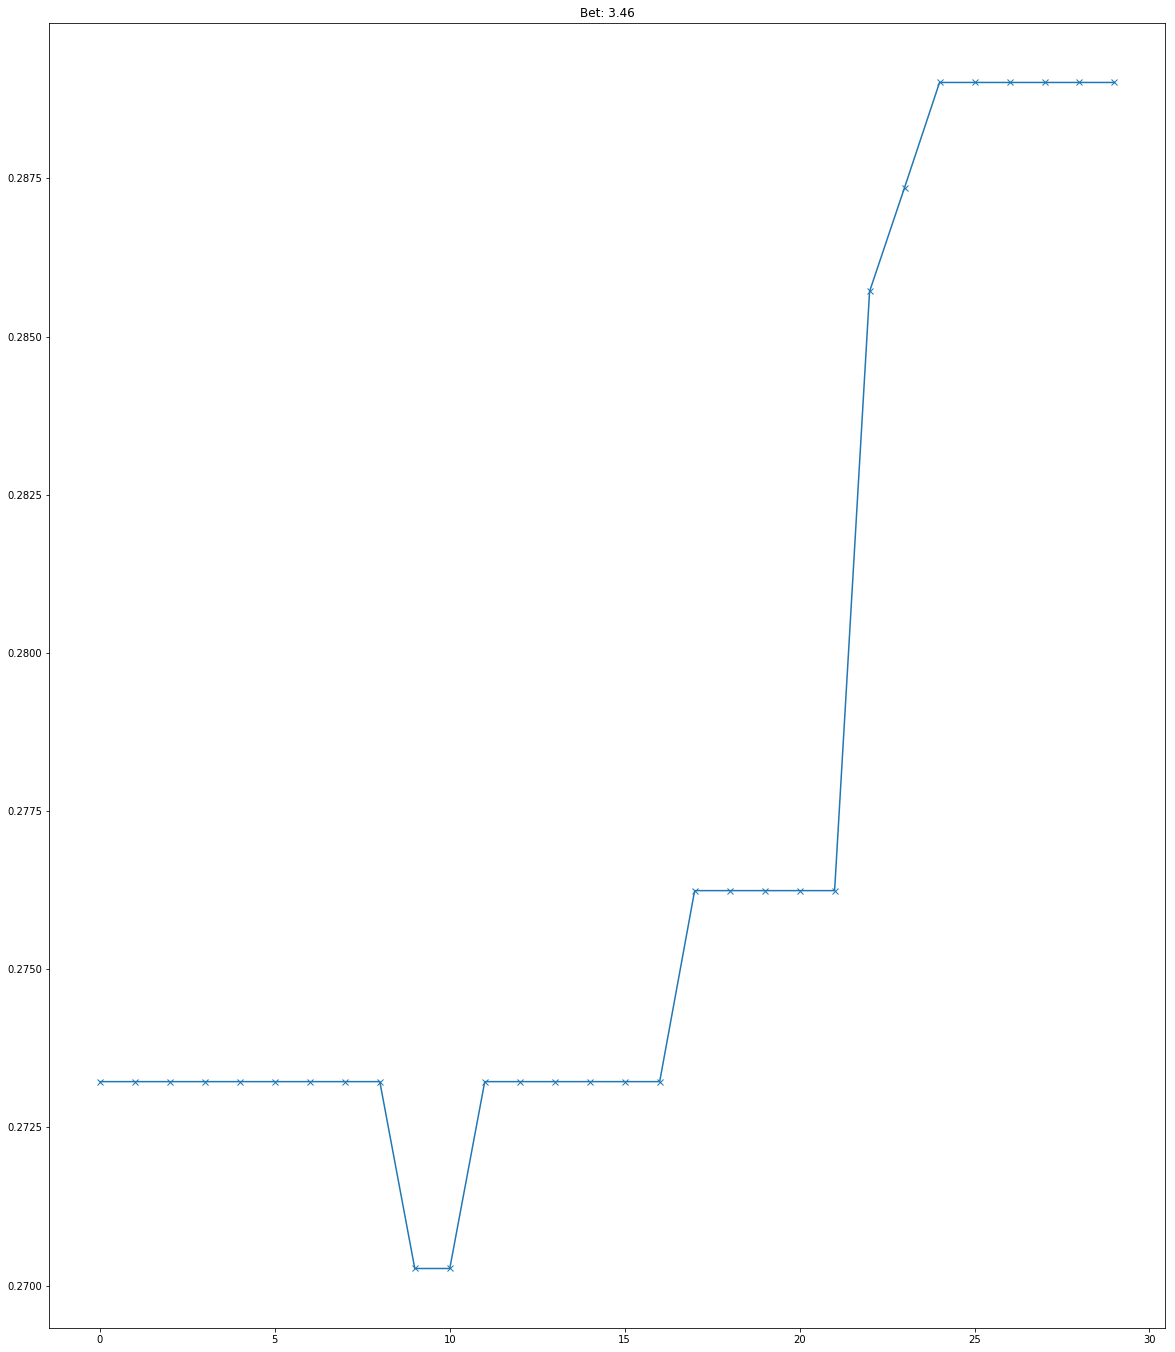

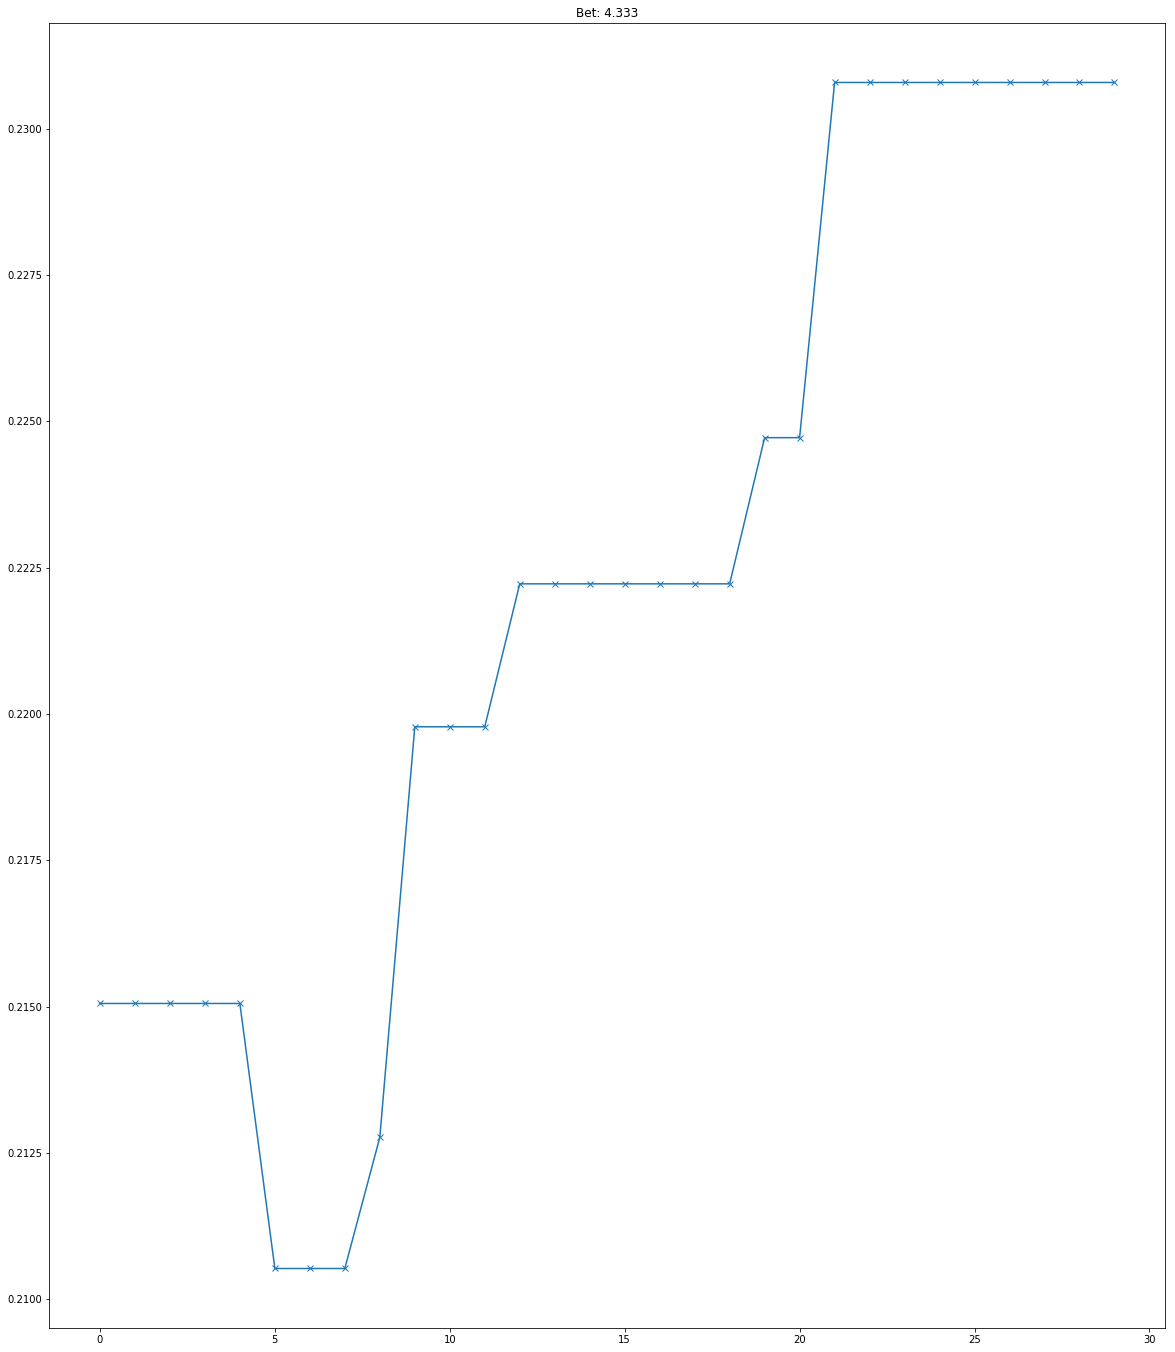

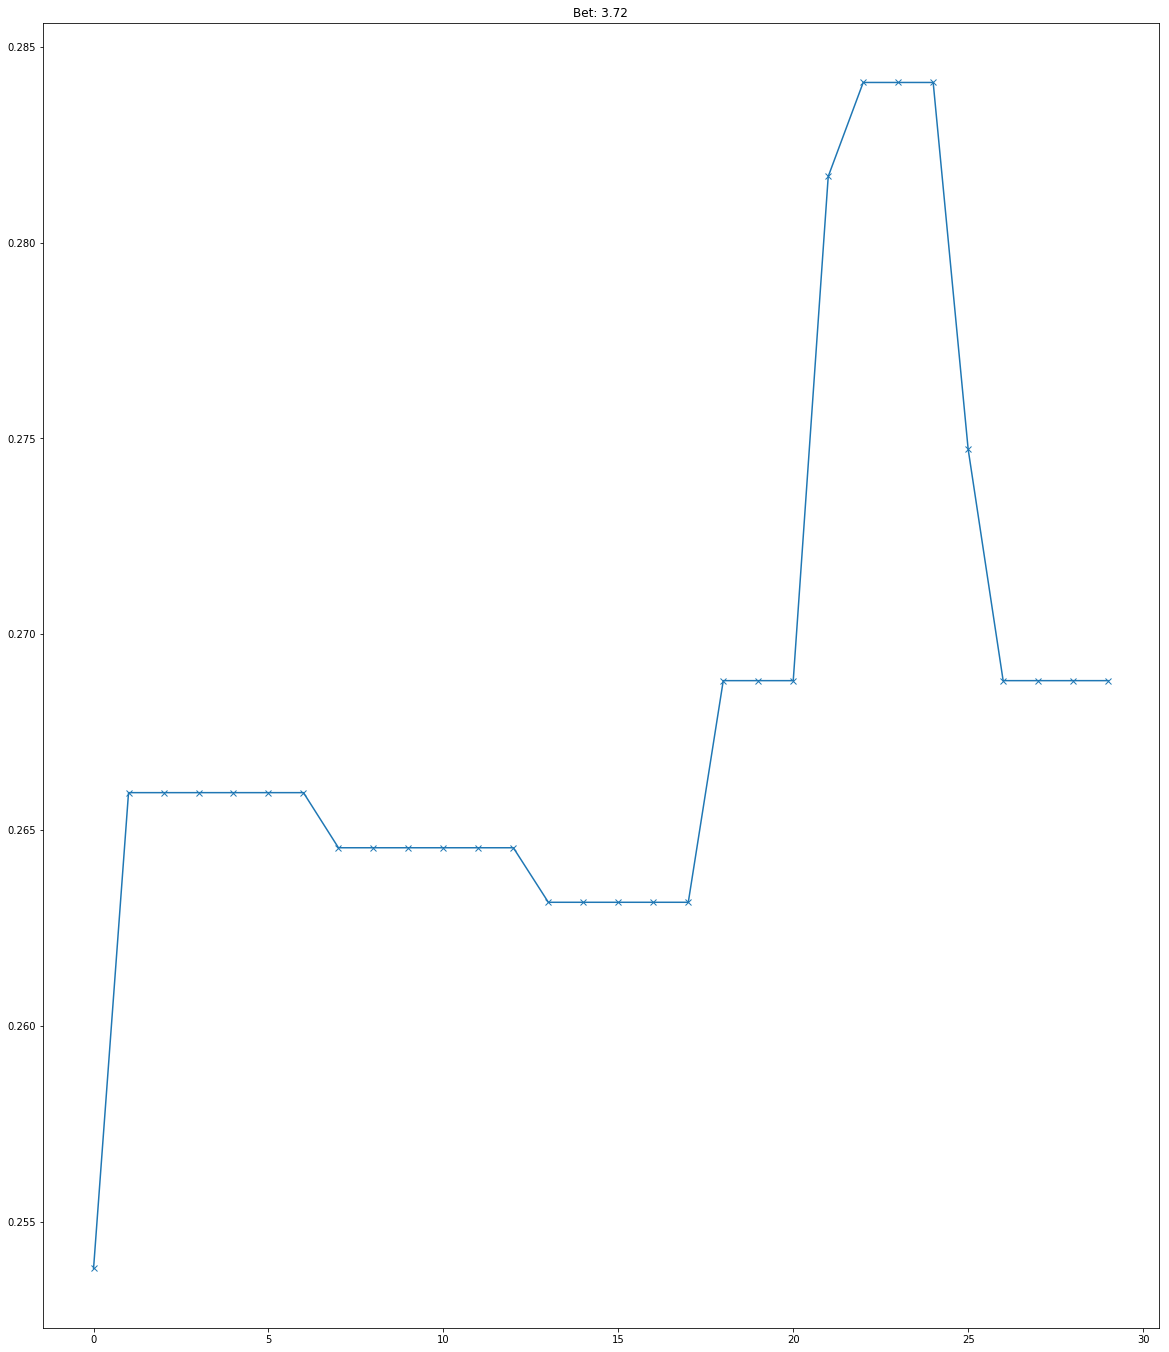

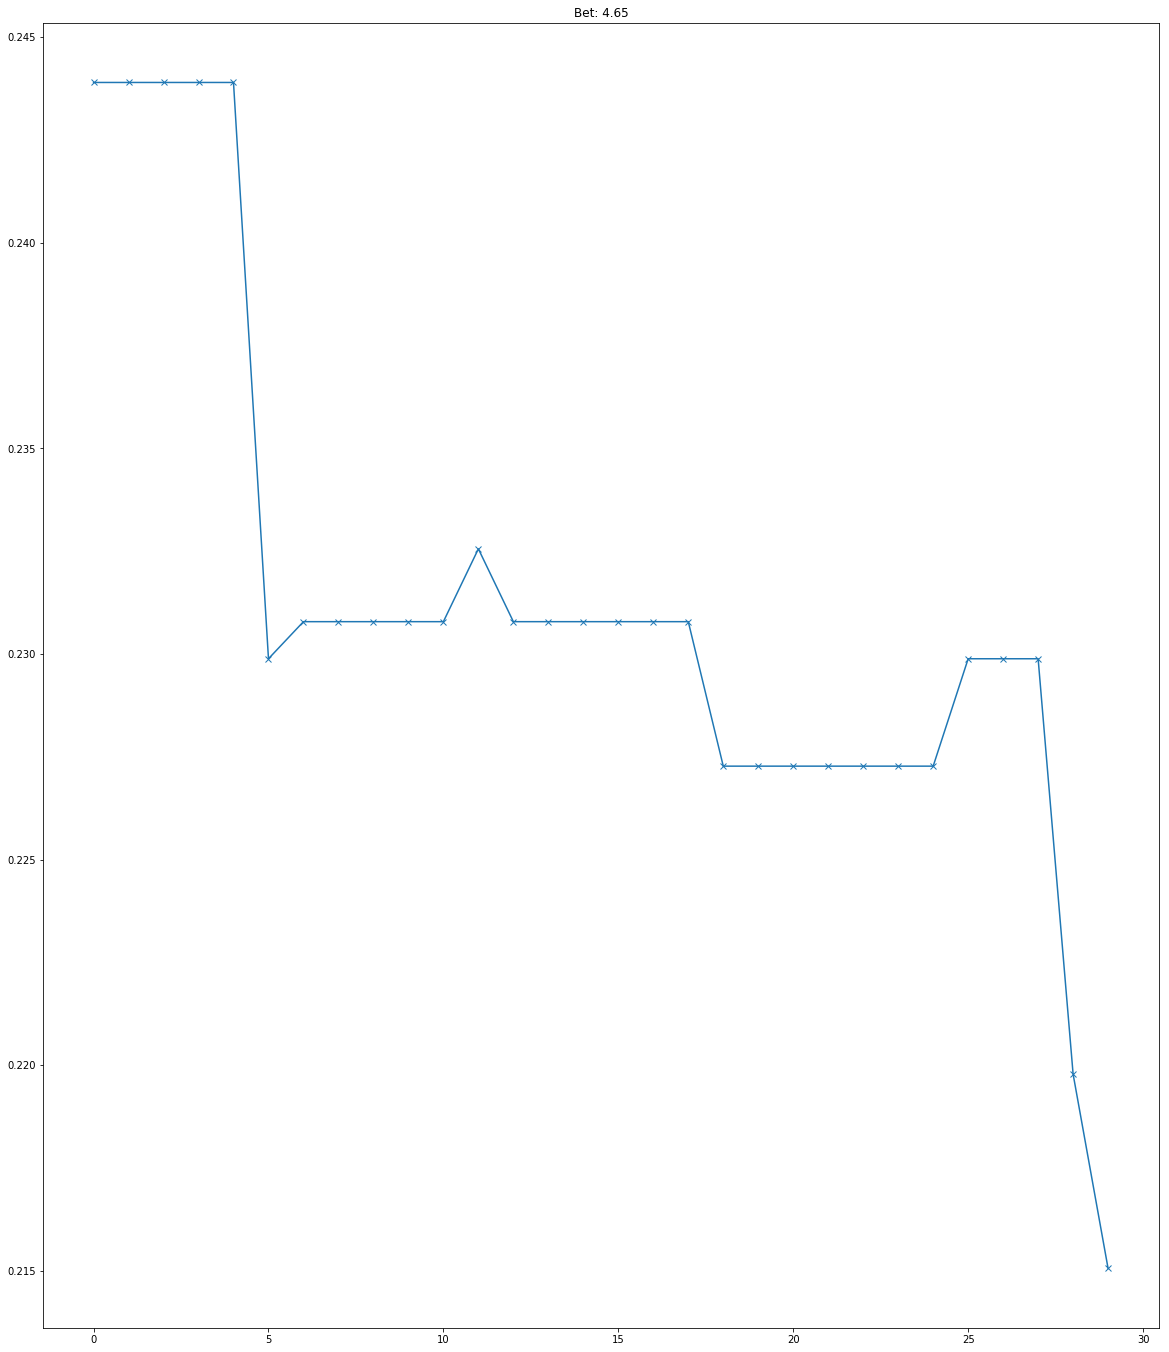

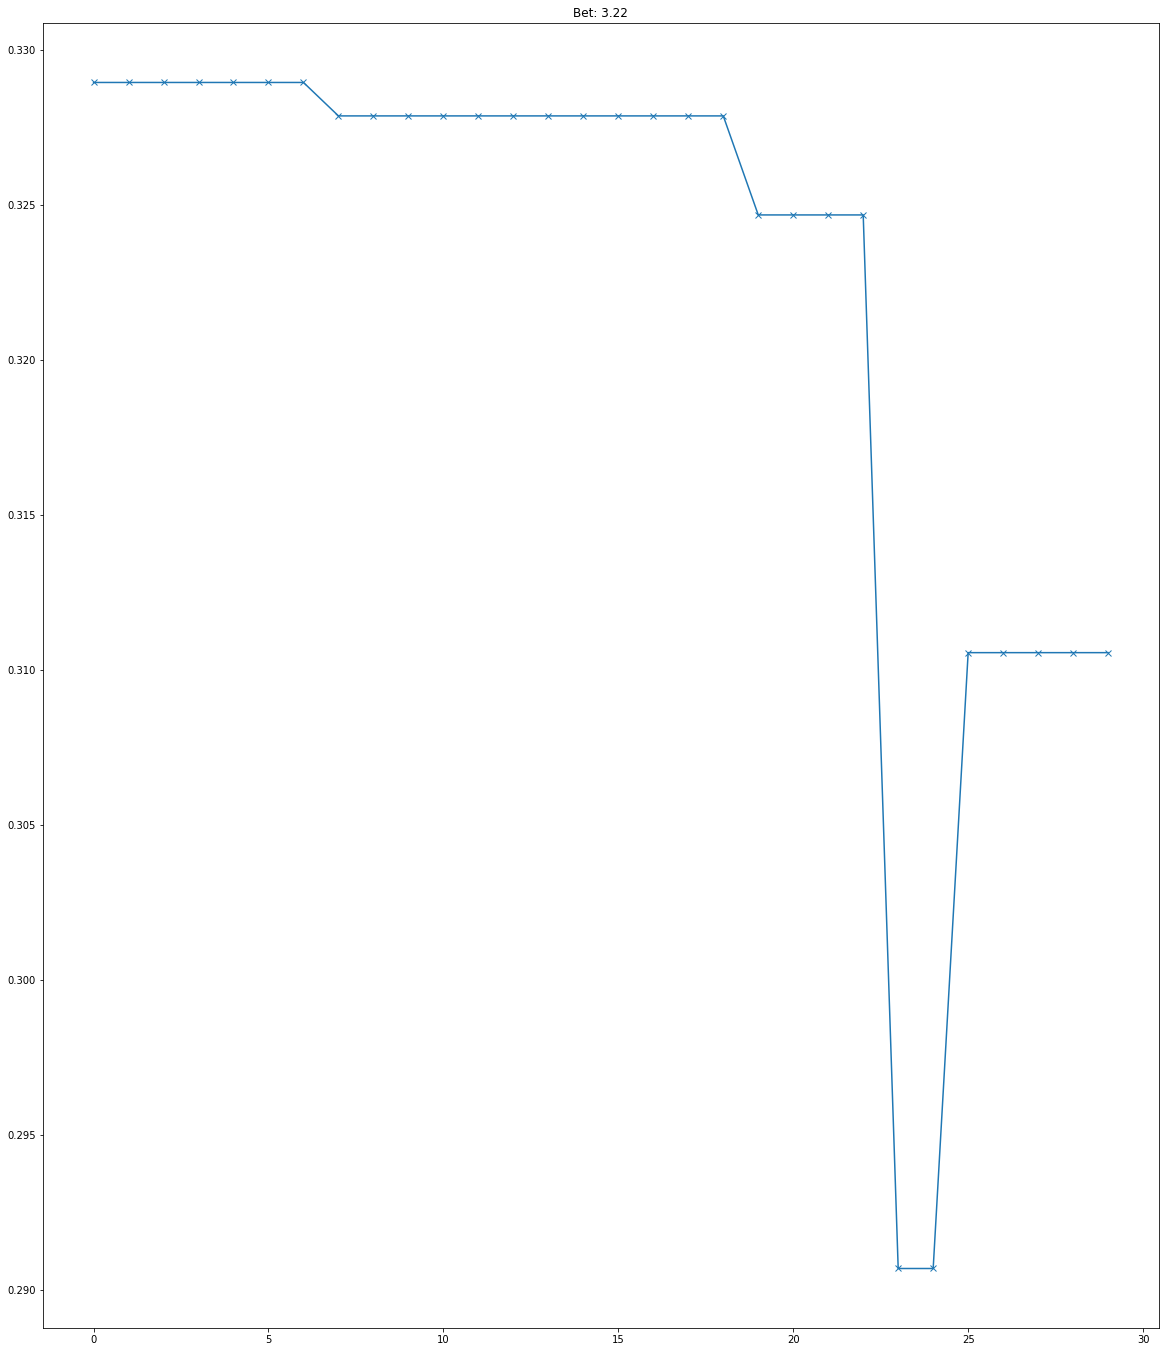

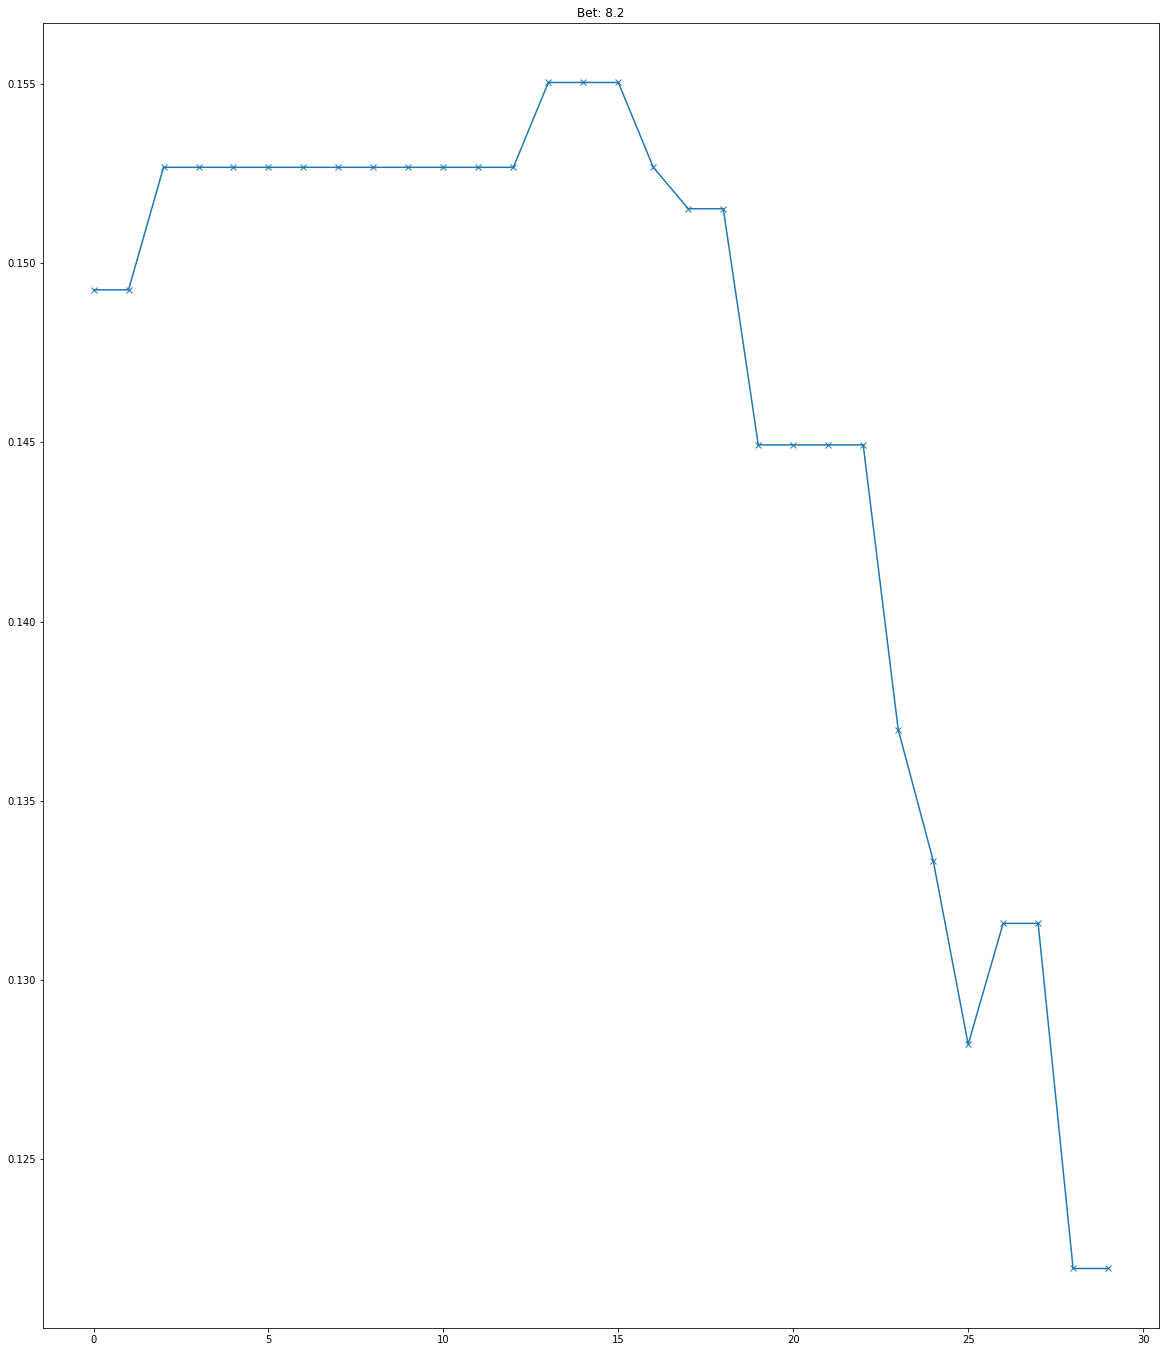

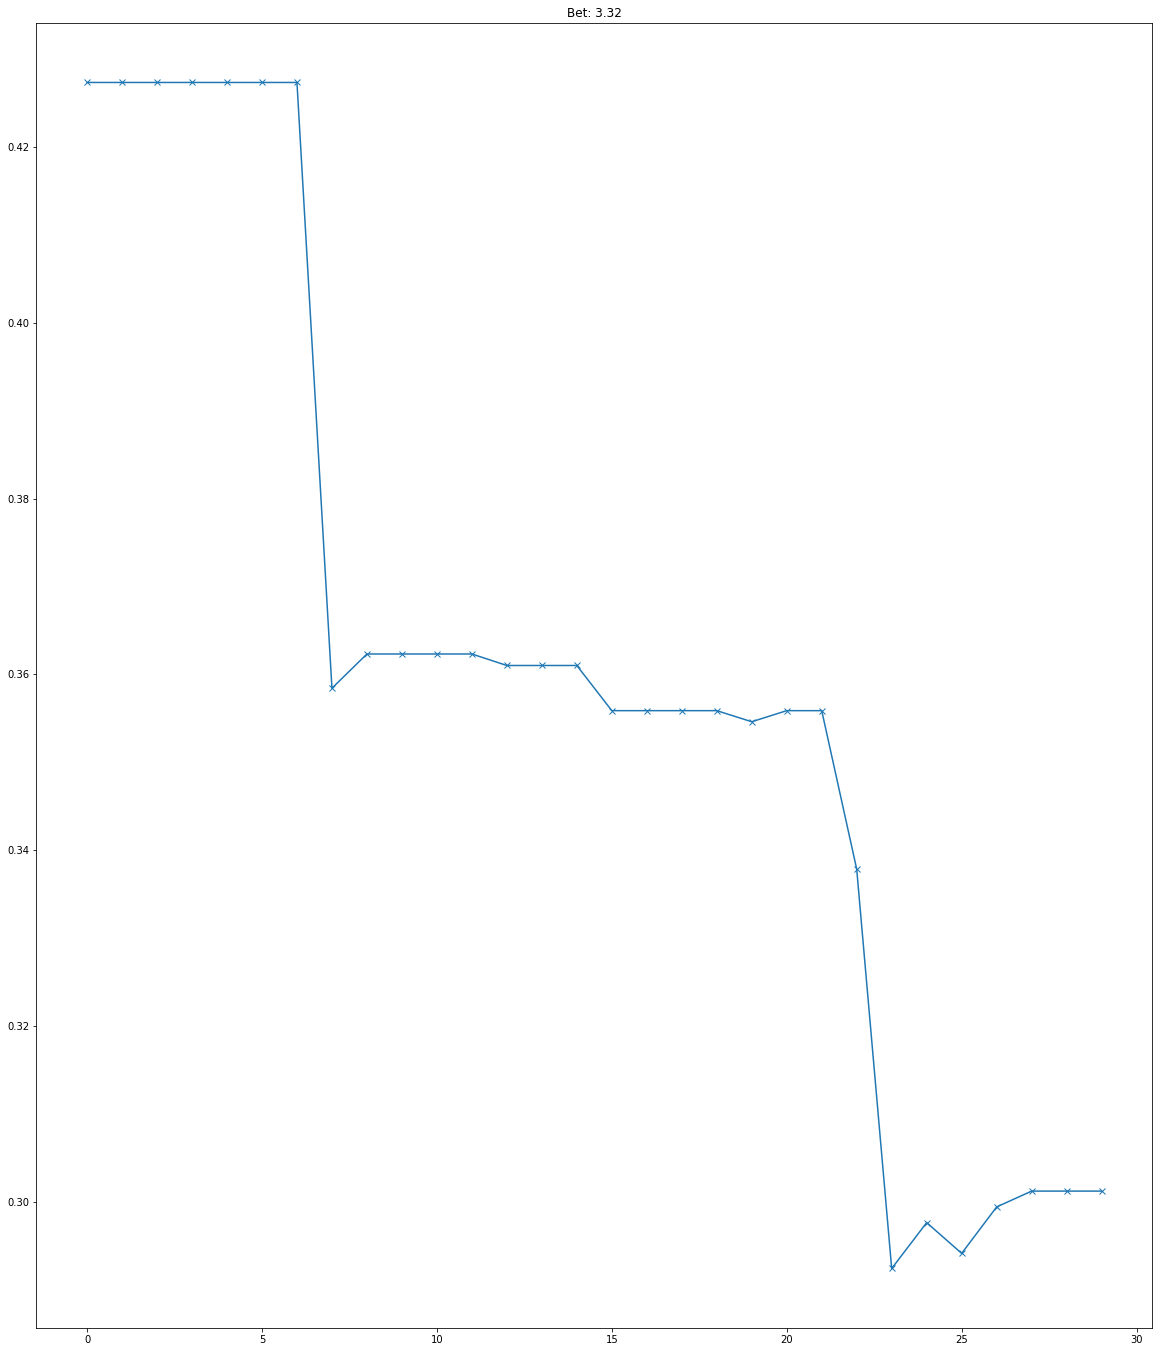

In [55]:
data = load_json('../data/khl_features_2018.json')
X_data = data['features'] 
X_graph = data['graphs'] 
Y_data = data['results'] 

for index in range(0, len(Y_data)):
    bet = X_data[index][0]
    if bet >= 3. and Y_data[index] == 1:
        y = X_graph[index]
        x = [i for i in range(0, len(y))]
        plt.title('Bet: {}'.format(bet))
        plt.plot(x, y, marker='x')
        plt.show()

In [62]:
data = load_json('../data/khl_features_2018.json')
Y_data = data['results'] 
X_data = data['features'] 

freq = []
freq_win = []
for i in range(0,10):
    freq.append(0.)
    freq_win.append(0.)
    
freq_size = len(freq)    

for index in range(0, len(Y_data)):
    bet = X_data[index][0]
    result = Y_data[index]
    freq_index = int(bet)
    if freq_index < freq_size:
        freq[freq_index] = freq[freq_index] + 1
        if result != 0:
            freq_win[freq_index] = freq_win[freq_index] + 1

for i in range(0,10):
    kef = 1*i
    ratio = freq_win[i]/freq[i] if freq[i] != 0. else 0.
    print '{} ({}): {}/{} = {}'.format(kef, ratio*kef, freq_win[i], freq[i], ratio)

summ = 0.
count = 0
for index in range(0, len(Y_data)):
    bet = X_data[index][0]
    result = Y_data[index]
    if bet >= 3.:
        count = count + 1
        if result != 0:
            summ = summ + bet - 1.
        else:
            summ = summ - 1.
print count
print summ
            
    

0 (0.0): 0.0/0.0 = 0.0
1 (0.567307692308): 59.0/104.0 = 0.567307692308
2 (0.75): 45.0/120.0 = 0.375
3 (1.07142857143): 15.0/42.0 = 0.357142857143
4 (1.07692307692): 7.0/26.0 = 0.269230769231
5 (0.714285714286): 3.0/21.0 = 0.142857142857
6 (1.63636363636): 3.0/11.0 = 0.272727272727
7 (0.0): 0.0/2.0 = 0.0
8 (8.0): 1.0/1.0 = 1.0
9 (0.0): 0.0/4.0 = 0.0
114
12.773


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data = load_json('../data/khl_features_2018.json')
X_data = data['features'] 
Y_data = data['results'] 

print len(X_data)
print len(Y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=0)
print len(y_test)
print len(X_data[0])

#classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
classifier.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(classifier.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(classifier.score(X_test, y_test)))

y_test_predicted = classifier.predict(X_test)
y_test_probability = classifier.predict_proba(X_test)

summ = 0.
print_line = ''
coeff_line = ''
games_in_count = 0
for index in range(0, len(y_test)):
    if y_test_predicted[index] == 1 and X_test[index][1] > 0.:
        coeff_line = coeff_line + '{} '.format(X_test[index][0])
        games_in_count = games_in_count + 1
        if y_test[index] == 1:
            print_line = print_line + '+'
            summ = summ + X_test[index][0] - 1
            print '+ {}: {} {}'.format(X_test[index][0], y_test_probability[index], summ)
        else:
            summ = summ - 1.
            print_line = print_line + '-'
            print '- {}: {} {}'.format(X_test[index][0], y_test_probability[index], summ)

print print_line
print coeff_line
print 'Games: {}, Total: {}, {} per game'.format(games_in_count, summ, summ/games_in_count);

338
338
85
1
Правильность на обучающем наборе: 0.723
Правильность на тестовом наборе: 0.647


IndexError: list index out of range

In [42]:
import seaborn as sns
from pandas import DataFrame

In [43]:
pythia_frame = DataFrame(X_data)
#pythia_frame.columns = ['coeff', 'ascend', 'descend', 'up_and_down', 'down_and_up']
pythia_frame.columns = ['coeff', 'diff']
pythia_frame['target'] = Y_data

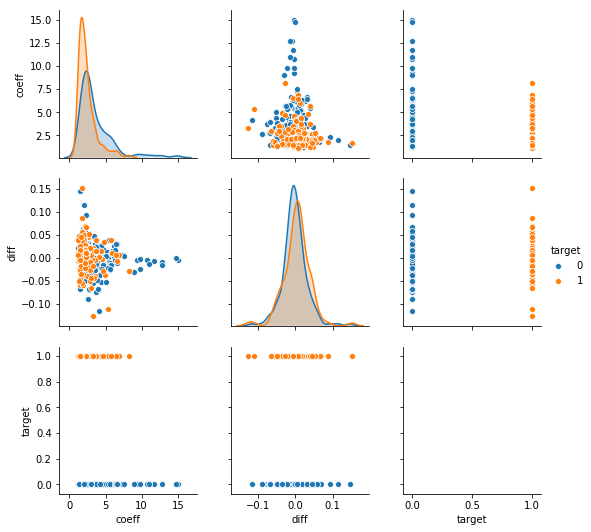

In [44]:
sns.pairplot(pythia_frame, hue = 'target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cab8559d0>]],
      dtype=object)

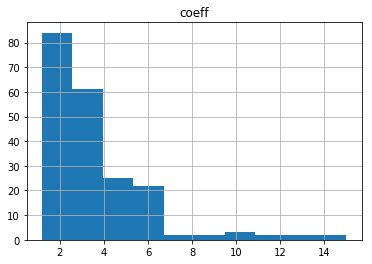

In [8]:
pythia_frame[pythia_frame.target == 0].hist('coeff')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cab1a2c90>]],
      dtype=object)

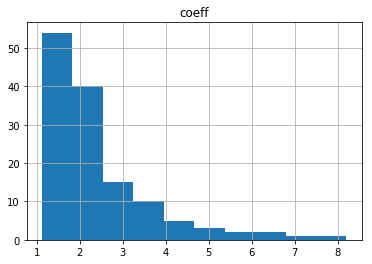

In [9]:
pythia_frame[pythia_frame.target == 1].hist('coeff')

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([84., 61., 25., 22.,  2.,  2.,  3.,  2.,  2.,  2.]),
 array([ 1.19 ,  2.571,  3.952,  5.333,  6.714,  8.095,  9.476, 10.857,
        12.238, 13.619, 15.   ]),
 <a list of 10 Patch objects>)

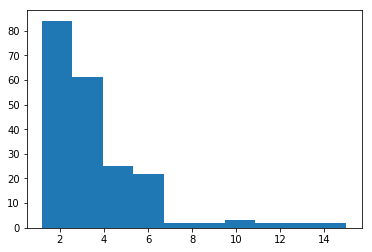

In [14]:

pyplot.hist(pythia_frame[pythia_frame.target == 0]['coeff'])

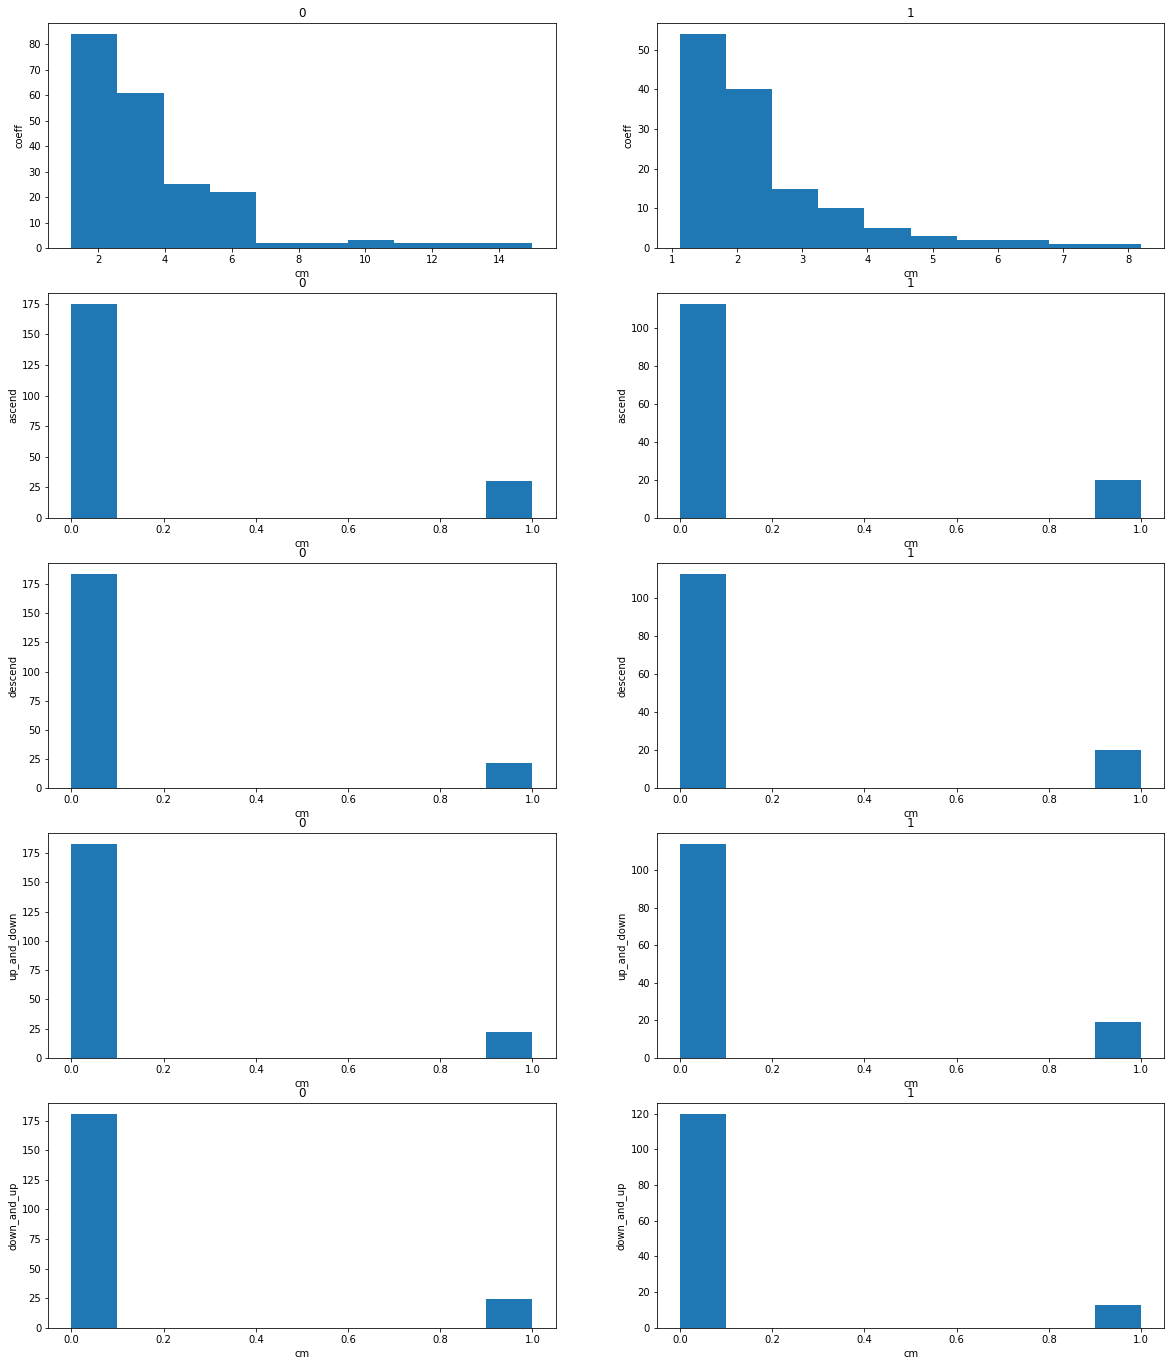

In [21]:
['coeff', 'ascend', 'descend', 'up_and_down', 'down_and_up']

pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in ['coeff', 'ascend', 'descend', 'up_and_down', 'down_and_up']:
    for target_name in [0, 1]:
        plot_number += 1
        pyplot.subplot(5, 2, plot_number)
        pyplot.hist(pythia_frame[pythia_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name)